In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import re
import os
import datetime
import plotly
import warnings
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
from sklearn import preprocessing

In [502]:
#from google.colab import drive
#drive.mount('/content/drive')

In [503]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [504]:
# Set the global default size of matplotlib figures
plt.figure(figsize=(16,8))
plt.rc('figure', figsize=(16,8))


<Figure size 1152x576 with 0 Axes>

In [505]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

#show_dataframe_info()

def SetColor(x):
    if isinstance(x, float):
        if(x <= 12):
            return "green"
        elif(x > 12 and x <= 35.4):
            return "yellow"
        elif(x >35.4 and x <= 55.4 ):
            return "orange"
        elif(x >55.4 and x <= 150.4 ):
            return "red"
        elif(x > 150.4  and x <= 250.4 ):
            return "purple"
        elif(x > 250.4):
            return "maroon"
        #else:
            #return "black"
            
def remove_special_characters(original_string):
    cleaned_string = re.sub('[^A-Za-z0-9_-]+', '', original_string)
    return cleaned_string

def create_directory(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
def make_simple_line_chart(x_axis_data,y_axis_data, x_axis_label,y_axis_label, chart_title, saved_fig_full_filepath='chart'):
    fig = plt.figure(figsize=(24,12))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    ax = fig.add_subplot(111)
    plt.plot(x_axis_data, y_axis_data, color='blue', marker='o', linestyle='solid')
    plt.title(chart_title, fontsize=20)
    plt.ylabel(y_axis_label, fontsize=20)
    plt.xlabel(x_axis_label,fontsize=20)
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
    
      ##coloring
    ax.axhspan(0, 12, facecolor='green')
    ax.axhspan(12, 35.4, facecolor='yellow')
    ax.axhspan(35.4, 55.4, facecolor='orange')
    ax.axhspan(55.4, 150.4, facecolor='red')
    ax.axhspan(150.4, 250.4, facecolor='purple')
    ax.axhspan(250.4, 500.4, facecolor='maroon')
    
    plt.show()
    fig.savefig(saved_fig_full_filepath + '.png')
    
    
def  generate_dates(number_of_days_to_subtract_from_currentdate):
    current_date = datetime.datetime.now()
    specified_date = current_date - datetime.timedelta(days =number_of_days_to_subtract_from_currentdate)
    return specified_date.strftime('%Y-%m-%d')
    
    

### Reading in greenness and airquality data for preprocessing

- uncomment the location you would like to preprocess below.


In [506]:
root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'
vi_base_dir ='data\Modis'

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','makerere_6f.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'makerere-vi-2017-2019','makerere-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath = os.path.join(base_dir,'Makerere')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','bugolobi.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'bugolobi_vi_2017_2019','bugolobi-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','mulago.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'mulago-vi-2017-2019','Mulago-actual-coordinates-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath= os.path.join(base_dir,'Mulago')

airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','makindye_rainbow_international_school.csv'))
vi_data = pd.read_csv(os.path.join(vi_base_dir,'makindye-vi-2017-2019','makindye-vi-2017-2019-MOD13A3-006-results.csv'))
filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','bukoto_kisu.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'bukoto-vi-2017-2019','bukoto-final-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')


airquality_data.head(10)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7
0,2017-06-30 21:54:28 UTC,1,17.36,23.44,42.72,1.39,0.000000,0.000000,NaN
1,2017-06-30 21:55:29 UTC,2,17.51,23.75,42.05,1.39,1000.000000,1000.000000,NaN
2,2017-06-30 21:56:35 UTC,3,17.28,23.30,50.69,1.39,0.358032,32.584686,NaN
3,2017-06-30 21:57:34 UTC,4,16.82,22.56,36.48,1.39,0.357840,32.584671,NaN
4,2017-06-30 21:58:33 UTC,5,16.91,22.57,38.55,1.39,0.357840,32.584671,NaN
5,2017-06-30 21:59:32 UTC,6,17.04,22.92,50.89,1.39,0.357840,32.584671,NaN
6,2017-06-30 22:00:31 UTC,7,16.94,22.71,42.73,1.39,0.357821,32.584530,NaN
7,2017-06-30 22:01:30 UTC,8,18.88,25.54,50.51,1.39,0.357680,32.584316,NaN
8,2017-06-30 22:03:00 UTC,9,18.64,25.19,49.61,1.39,0.357587,32.584194,NaN
9,2017-06-30 22:03:59 UTC,10,19.89,26.93,51.20,1.39,0.357587,32.584194,NaN


In [507]:
print(airquality_data.columns)
airquality_data.rename(columns={'field1':'PM1(Ug/m3)','field2':'PM2.5(Ug/m3)',
                                     'field3':'PM10(Ug/m3)', 'field4':'Sample period',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage'
                                     },inplace=True)


Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7'],
      dtype='object')


In [508]:
airquality_data.head()

,created_at,entry_id,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),Sample period,Latitude,Longitude,Battery Voltage
0,2017-06-30 21:54:28 UTC,1,17.36,23.44,42.72,1.39,0.000000,0.000000,NaN
1,2017-06-30 21:55:29 UTC,2,17.51,23.75,42.05,1.39,1000.000000,1000.000000,NaN
2,2017-06-30 21:56:35 UTC,3,17.28,23.30,50.69,1.39,0.358032,32.584686,NaN
3,2017-06-30 21:57:34 UTC,4,16.82,22.56,36.48,1.39,0.357840,32.584671,NaN
4,2017-06-30 21:58:33 UTC,5,16.91,22.57,38.55,1.39,0.357840,32.584671,NaN


In [509]:
airquality_data.tail()

,created_at,entry_id,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),Sample period,Latitude,Longitude,Battery Voltage
515961,2019-04-05 11:46:09 UTC,515962,1.74,2.83,9.45,1.39,0.283672,32.600422,4.18
515962,2019-04-05 11:47:18 UTC,515963,2.19,3.11,5.48,1.39,0.283652,32.600452,4.34
515963,2019-04-05 11:48:32 UTC,515964,2.44,3.40,6.63,1.39,0.283641,32.600372,4.38
515964,2019-04-05 11:49:40 UTC,515965,2.70,3.49,4.91,1.39,0.283662,32.600361,4.38
515965,2019-04-05 11:50:48 UTC,515966,2.52,3.20,5.38,1.39,0.283718,32.600285,4.13


In [510]:
show_dataframe_info(airquality_data)

(515966, 9)
['created_at', 'entry_id', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'Sample period', 'Latitude', 'Longitude', 'Battery Voltage']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515966 entries, 0 to 515965
Data columns (total 9 columns):
created_at         515966 non-null object
entry_id           515966 non-null int64
PM1(Ug/m3)         515966 non-null float64
PM2.5(Ug/m3)       515966 non-null float64
PM10(Ug/m3)        515966 non-null float64
Sample period      515966 non-null float64
Latitude           515966 non-null float64
Longitude          515966 non-null float64
Battery Voltage    501853 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 35.4+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at          object
entry_id             int64
PM1(Ug/m3)         float64
PM2.5(Ug/m3)       float64
PM10(Ug/m3)        float64
Sample period      float64
Latitude           float64
Longitude          float64
Battery Voltage    float64

In [511]:
airquality_data.describe()

,entry_id,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),Sample period,Latitude,Longitude,Battery Voltage
count,515966.000000,515966.000000,515966.000000,515966.000000,515966.000000,515966.000000,515966.000000,501853.000000
mean,257983.500000,11.765579,16.640691,29.675815,1.388959,29.939538,61.232581,4.486813
std,148946.698834,22.099206,35.487641,44.281194,0.032638,169.532847,164.066187,0.268546
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000
25%,128992.250000,3.960000,5.730000,11.610000,1.390000,0.283692,32.569908,4.300000
50%,257983.500000,7.300000,10.420000,21.060000,1.390000,0.332196,32.570000,4.400000
75%,386974.750000,13.920000,19.500000,36.900000,1.390000,0.332259,32.600391,4.700000
max,515966.000000,2441.510000,3717.700000,6557.410000,1.710000,1000.000000,1000.000000,5.000000


Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning and deeplearning algorithms.

Plot a few features to get a better idea of each:



### Drop columns that shall not be used during analysis
- entry_id
- Battery Voltage
- Latitiude
- Longitude
- Sample Period

In [512]:
airquality_data_of_interest = airquality_data.drop(['entry_id','Latitude', 'Longitude', 
                                                    'Battery Voltage','Sample period'], axis=1)

In [513]:
airquality_data_of_interest.shape
show_dataframe_info(airquality_data_of_interest)

(515966, 4)
['created_at', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515966 entries, 0 to 515965
Data columns (total 4 columns):
created_at      515966 non-null object
PM1(Ug/m3)      515966 non-null float64
PM2.5(Ug/m3)    515966 non-null float64
PM10(Ug/m3)     515966 non-null float64
dtypes: float64(3), object(1)
memory usage: 15.7+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at       object
PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


#### Ensure to convert all column values to float. there certain columns like pm1 and pm10 that have values which are not floats
  Utiliy method goes through all the values in the columns and checks if they are float if not it tries to convert them to float if they fail, it makes the value NaN.

In [514]:
cols_to_convert_to_float = ['PM1(Ug/m3)','PM2.5(Ug/m3)','PM10(Ug/m3)']
for col in cols_to_convert_to_float:
    airquality_data_of_interest[col] = pd.to_numeric(airquality_data_of_interest[col], errors='coerce')

### Convert data into timeseries dataframe with datetime being the index

In [515]:
#parsing the created_at field into a datetime object
airquality_data_of_interest["TimeStamp"] = pd.to_datetime(airquality_data_of_interest["created_at"])

is_utc_date = airquality_data_of_interest['created_at'].loc[0]
print(is_utc_date)

if "UTC" in is_utc_date:
    print('utc found')
    airquality_data_of_interest["TimeStamp"] = airquality_data_of_interest["TimeStamp"]+ datetime.timedelta(hours=3)

    
time_indexed_data = airquality_data_of_interest.set_index('TimeStamp')
time_indexed_data = time_indexed_data.drop(['created_at'], axis=1)

2017-06-30 21:54:28 UTC
utc found


In [516]:
time_indexed_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-07-01 00:54:28,17.36,23.44,42.72
2017-07-01 00:55:29,17.51,23.75,42.05
2017-07-01 00:56:35,17.28,23.30,50.69
2017-07-01 00:57:34,16.82,22.56,36.48
2017-07-01 00:58:33,16.91,22.57,38.55


### Filter out outliers and remain with records with pm2.5 less than 500.4 and records with pm2.5 values  greater than zero

In [517]:
time_indexed_data = time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] <= 500.4]
time_indexed_data = time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] > 0]
print(time_indexed_data.shape)
time_indexed_data.max()
time_indexed_data.min()
#time_indexed_data = time_indexed_data.where(time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] <= 500.4], other=(hourly_average_airquality_data_concentrations.fillna(method='ffill')+hourly_average_airquality_data_concentrations.fillna(method='bfill'))/2)

(514723, 3)


PM1(Ug/m3)      0.00
PM2.5(Ug/m3)    0.01
PM10(Ug/m3)     0.01
dtype: float64

## Visualize the entire dataset pm2.5 timeseries

### Compute average hourly, daily, monthly concentration values (mean of the concentrations for each hour)
- parse the created_at column into datetime.
- set the created_at column to be the index for the dataframe.
- calculate the corresponding means for hourly, daily and monthly

In [518]:
hourly_average_airquality_data_concentrations = time_indexed_data.resample('H').mean().round(2) #.dropna(axis=0)
hourly_maximum_airquality_data_concentrations  = time_indexed_data.resample('H').max().round(2)#.dropna(axis=0)
hourly_minimum_airquality_data_concentrations  = time_indexed_data.resample('H').min().round(2)#.dropna(axis=0)

daily_average_airquality_data_concentrations  = time_indexed_data.resample('D').mean().round(2)#.dropna(axis=0)
daily_maximum_airquality_data_concentrations  = time_indexed_data.resample('D').max().round(2)#.dropna(axis=0)
daily_minimum_airquality_data_concentrations  = time_indexed_data.resample('D').min()#.dropna(axis=0)

monthly_average_airquality_data_concentrations  = time_indexed_data.resample('M').mean().round(2) #.dropna(axis=0)


hourly_average_airquality_data_concentrations.head()

#hourly has alot of NaNs, need to find out why.
#drop nans
monthly_average_airquality_data_concentrations_analysis= monthly_average_airquality_data_concentrations.dropna(axis=0)
hourly_average_airquality_data_concentrations_analysis  = hourly_average_airquality_data_concentrations.dropna(axis=0)
daily_average_airquality_data_concentrations_analysis  =  daily_average_airquality_data_concentrations.dropna(axis=0)

In [519]:
daily_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-07-01,14.11,21.52,50.04
2017-07-02,34.35,49.05,114.03
2017-07-03,21.07,26.82,48.24
2017-07-04,15.51,22.61,43.63
2017-07-05,22.63,31.80,55.22
2017-07-06,11.22,15.77,39.04
2017-07-07,4.95,7.85,18.45
2017-07-08,NaN,NaN,NaN
2017-07-09,14.08,26.97,211.33


In [520]:
print(daily_average_airquality_data_concentrations.size)
#daily_airquality_data_concentrations.isnull()
daily_average_missing_airquality_data = daily_average_airquality_data_concentrations[daily_average_airquality_data_concentrations.isnull()]
#df_null = daily_airquality_data_concentrations[daily_airquality_data_concentrations.notnull().any(axis=1)]

1932


### Display information related to dataframe  after 24-hr-average(daily) and monthly average

In [521]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(644, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 2017-07-01 to 2019-04-05
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      504 non-null float64
PM2.5(Ug/m3)    504 non-null float64
PM10(Ug/m3)     504 non-null float64
dtypes: float64(3)
memory usage: 20.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [522]:
daily_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-07-01,14.11,21.52,50.04
2017-07-02,34.35,49.05,114.03
2017-07-03,21.07,26.82,48.24
2017-07-04,15.51,22.61,43.63
2017-07-05,22.63,31.80,55.22
2017-07-06,11.22,15.77,39.04
2017-07-07,4.95,7.85,18.45
2017-07-08,NaN,NaN,NaN
2017-07-09,14.08,26.97,211.33


In [523]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(644, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 2017-07-01 to 2019-04-05
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      504 non-null float64
PM2.5(Ug/m3)    504 non-null float64
PM10(Ug/m3)     504 non-null float64
dtypes: float64(3)
memory usage: 20.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [524]:
show_dataframe_info(monthly_average_airquality_data_concentrations)

(22, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2017-07-31 to 2019-04-30
Freq: M
Data columns (total 3 columns):
PM1(Ug/m3)      22 non-null float64
PM2.5(Ug/m3)    22 non-null float64
PM10(Ug/m3)     22 non-null float64
dtypes: float64(3)
memory usage: 704.0 bytes

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [525]:
monthly_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-07-31,15.57,22.34,52.98
2017-08-31,9.94,14.51,39.03
2017-09-30,8.93,12.88,29.18
2017-10-31,7.40,12.30,29.01
2017-11-30,9.82,16.76,27.67
2017-12-31,11.69,19.00,38.68
2018-01-31,7.62,12.05,28.98
2018-02-28,7.72,10.80,28.49
2018-03-31,16.21,28.16,37.61


### filling in the missing values with the average of the value after and before 

In [526]:
monthly_average_airquality_data_concentrations = monthly_average_airquality_data_concentrations.where(monthly_average_airquality_data_concentrations.notnull(), other=(monthly_average_airquality_data_concentrations.fillna(method='ffill')+monthly_average_airquality_data_concentrations.fillna(method='bfill'))/2)
daily_average_airquality_data_concentrations = daily_average_airquality_data_concentrations.where(daily_average_airquality_data_concentrations.notnull(), other=(daily_average_airquality_data_concentrations.fillna(method='ffill')+daily_average_airquality_data_concentrations.fillna(method='bfill'))/2)

### Visualize the daily  pm2.5 concentration timeseries

In [527]:
print(daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].size)
y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values
print(y.size)

644
644


In [528]:
##remove nan for visualizations 
#y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna()
y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values
pm25 = go.Scatter(x=daily_average_airquality_data_concentrations.dropna().index,
                  y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values, 
                  mode='markers',
                  marker = dict(color=list(map(SetColor, y)),size=15)
                  
                 ) 

layout = go.Layout(title='Daily Average PM2.5 Concentration', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'daily_average_pm25_concentration.png'))


In [529]:
average_daily_pm25 = go.Scatter(x=daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().index,
                         y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values,
                         #mode='lines+markers',
                         #marker = dict(color=list(map(SetColor, y_average)), size = 17),
                         name='Average Daily PM2.5 Concentration'
                         #hoverinfo = 'text',
                         #text=[f'PM2.5 Concentration: {x:.2f} ug/m3' for x in daily_average_airquality_data_concentrations['PM2.5(Ug/m3)']]
                 )

layout = go.Layout(title='Daily PM2.5 Concentration', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[average_daily_pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'daily_average_pm25_concentration_trend.png'))

### Visualize the monthly pm2.5 concentration

In [530]:
average_monthly_pm25 = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values
monthly_pm25 = go.Scatter(x=monthly_average_airquality_data_concentrations.index,
                         y = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values,
                         mode='lines+markers',
                         marker = dict(color=list(map(SetColor, average_monthly_pm25)), size = 17),
                 ) 

layout = go.Layout(title='Monthly Average PM2.5 ', xaxis=dict(title='Date(UTC)'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[monthly_pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'monthly_average_pm25_concentration.png'))


In [531]:
monthly_pm25_trend = go.Scatter(x=monthly_average_airquality_data_concentrations.index,
                         y = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values,
                         #mode='lines+markers',
                        #marker = dict(color=list(map(SetColor, average_monthly_pm25)), size = 17),
                 ) 

layout = go.Layout(title='Monthly Average PM2.5 ', xaxis=dict(title='Date(UTC)'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[monthly_pm25_trend], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'monthly_average_pm25_concentration_trend.png'))


### Display the concentrations
- hourly pm2.5
- daily  pm2.5
- monthly pm2.5

### Visualize the hourly pm2.5 concentration

In [532]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(15447, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15447 entries, 2017-07-01 00:00:00 to 2019-04-05 14:00:00
Freq: H
Data columns (total 3 columns):
PM1(Ug/m3)      10564 non-null float64
PM2.5(Ug/m3)    10564 non-null float64
PM10(Ug/m3)     10564 non-null float64
dtypes: float64(3)
memory usage: 482.7 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [533]:
#hourly_airquality_data_concentrations['PM2.5(Ug/m3)'].max()

In [534]:
hourly_pm25_trend = go.Scatter(x=hourly_average_airquality_data_concentrations.dropna().index,
                         y = hourly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values,
                 ) 

layout = go.Layout(title='Hourly Average PM2.5', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[hourly_pm25_trend], layout=layout)
iplot(fig)
pio.write_image(fig,os.path.join(filepath , 'hourly_average_pm25_concentration_trend.png'))


In [535]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(15447, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15447 entries, 2017-07-01 00:00:00 to 2019-04-05 14:00:00
Freq: H
Data columns (total 3 columns):
PM1(Ug/m3)      10564 non-null float64
PM2.5(Ug/m3)    10564 non-null float64
PM10(Ug/m3)     10564 non-null float64
dtypes: float64(3)
memory usage: 482.7 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [536]:
hourly_average_airquality_data_concentrations['hour'] = hourly_average_airquality_data_concentrations.index.hour
hourly_average_airquality_data_concentrations['Hour']= pd.to_timedelta(hourly_average_airquality_data_concentrations['hour'],unit='h')

hourly_average_airquality_data_concentrations_analysis['hour'] = hourly_average_airquality_data_concentrations_analysis.index.hour
hourly_average_airquality_data_concentrations_analysis['Hour']= pd.to_timedelta(hourly_average_airquality_data_concentrations_analysis['hour'],unit='h')
##workaround to get hours for display on graph
#hourly_average_airquality_data_concentrations = hourly_average_airquality_data_concentrations.drop(['hour'], axis=1)
#hourly_average_airquality_data_concentrations['month'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.month
#hourly_average_airquality_data_concentrations['year'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.year
#hourly_average_airquality_data_concentrations['day_of_month'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.day

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [537]:
current_date = generate_dates(0)
current_date

'2019-07-25'

In [538]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(15447, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15447 entries, 2017-07-01 00:00:00 to 2019-04-05 14:00:00
Freq: H
Data columns (total 5 columns):
PM1(Ug/m3)      10564 non-null float64
PM2.5(Ug/m3)    10564 non-null float64
PM10(Ug/m3)     10564 non-null float64
hour            15447 non-null int64
Hour            15447 non-null timedelta64[ns]
dtypes: float64(3), int64(1), timedelta64[ns](1)
memory usage: 724.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)              float64
PM2.5(Ug/m3)            float64
PM10(Ug/m3)             float64
hour                      int64
Hour            timedelta64[ns]
dtype: object


#### fill the missing hours with the average of the hours through the dataset

In [539]:
cols = ['PM1(Ug/m3)','PM2.5(Ug/m3)','PM10(Ug/m3)']
original_hourly_data = hourly_average_airquality_data_concentrations.copy()
hourly_average_airquality_data_concentrations[cols] = hourly_average_airquality_data_concentrations[cols].fillna(hourly_average_airquality_data_concentrations.groupby(hourly_average_airquality_data_concentrations['Hour'])[cols].transform('mean').round(2))

In [540]:
original_hourly_data.head(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-07-01 00:00:00,17.15,23.09,43.56,0,00:00:00
2017-07-01 01:00:00,33.85,44.78,78.61,1,01:00:00
2017-07-01 02:00:00,37.79,52.78,82.12,2,02:00:00
2017-07-01 03:00:00,NaN,NaN,NaN,3,03:00:00
2017-07-01 04:00:00,NaN,NaN,NaN,4,04:00:00
2017-07-01 05:00:00,NaN,NaN,NaN,5,05:00:00
2017-07-01 06:00:00,NaN,NaN,NaN,6,06:00:00
2017-07-01 07:00:00,NaN,NaN,NaN,7,07:00:00
2017-07-01 08:00:00,NaN,NaN,NaN,8,08:00:00


In [541]:
hourly_average_airquality_data_concentrations.head(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-07-01 00:00:00,17.15,23.09,43.56,0,00:00:00
2017-07-01 01:00:00,33.85,44.78,78.61,1,01:00:00
2017-07-01 02:00:00,37.79,52.78,82.12,2,02:00:00
2017-07-01 03:00:00,13.99,19.19,27.34,3,03:00:00
2017-07-01 04:00:00,13.23,18.15,25.93,4,04:00:00
2017-07-01 05:00:00,13.45,18.53,25.86,5,05:00:00
2017-07-01 06:00:00,14.06,19.48,29.83,6,06:00:00
2017-07-01 07:00:00,15.41,21.54,38.96,7,07:00:00
2017-07-01 08:00:00,13.20,18.48,36.88,8,08:00:00


In [542]:
average_pm25_concentration_for_each_hour_of_day = hourly_average_airquality_data_concentrations_analysis.groupby(['Hour']).mean().round(2) #.groups.keys()
average_pm25_concentration_for_each_hour_of_day

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour
Hour,,,,
00:00:00,16.59,22.76,39.24,0
01:00:00,16.15,22.14,35.52,1
02:00:00,15.33,21.00,31.42,2
03:00:00,13.99,19.19,27.34,3
04:00:00,13.23,18.15,25.93,4
05:00:00,13.45,18.53,25.86,5
06:00:00,14.06,19.48,29.83,6
07:00:00,15.41,21.54,38.96,7
08:00:00,13.20,18.48,36.88,8


In [543]:
current_date = datetime.datetime.now()
average_pm25_concentration_for_each_hour_of_day['Date'] = pd.to_datetime(current_date.strftime('%Y-%m-%d')) 
average_pm25_concentration_for_each_hour_of_day['Time(hrs)']= average_pm25_concentration_for_each_hour_of_day.index
average_pm25_concentration_for_each_hour_of_day['Time(hrs)']
average_pm25_concentration_for_each_hour_of_day[['Date','Time(hrs)']].dtypes
average_pm25_concentration_for_each_hour_of_day['TimeStamp']  = average_pm25_concentration_for_each_hour_of_day['Date']+ average_pm25_concentration_for_each_hour_of_day['Time(hrs)']
average_pm25_concentration_for_each_hour_of_day.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Date,Time(hrs),TimeStamp
Hour,,,,,,,
00:00:00,16.59,22.76,39.24,0,2019-07-25,00:00:00,2019-07-25 00:00:00
01:00:00,16.15,22.14,35.52,1,2019-07-25,01:00:00,2019-07-25 01:00:00
02:00:00,15.33,21.00,31.42,2,2019-07-25,02:00:00,2019-07-25 02:00:00
03:00:00,13.99,19.19,27.34,3,2019-07-25,03:00:00,2019-07-25 03:00:00
04:00:00,13.23,18.15,25.93,4,2019-07-25,04:00:00,2019-07-25 04:00:00


### Visualize the average of pm2.5 for each hour in the dataset

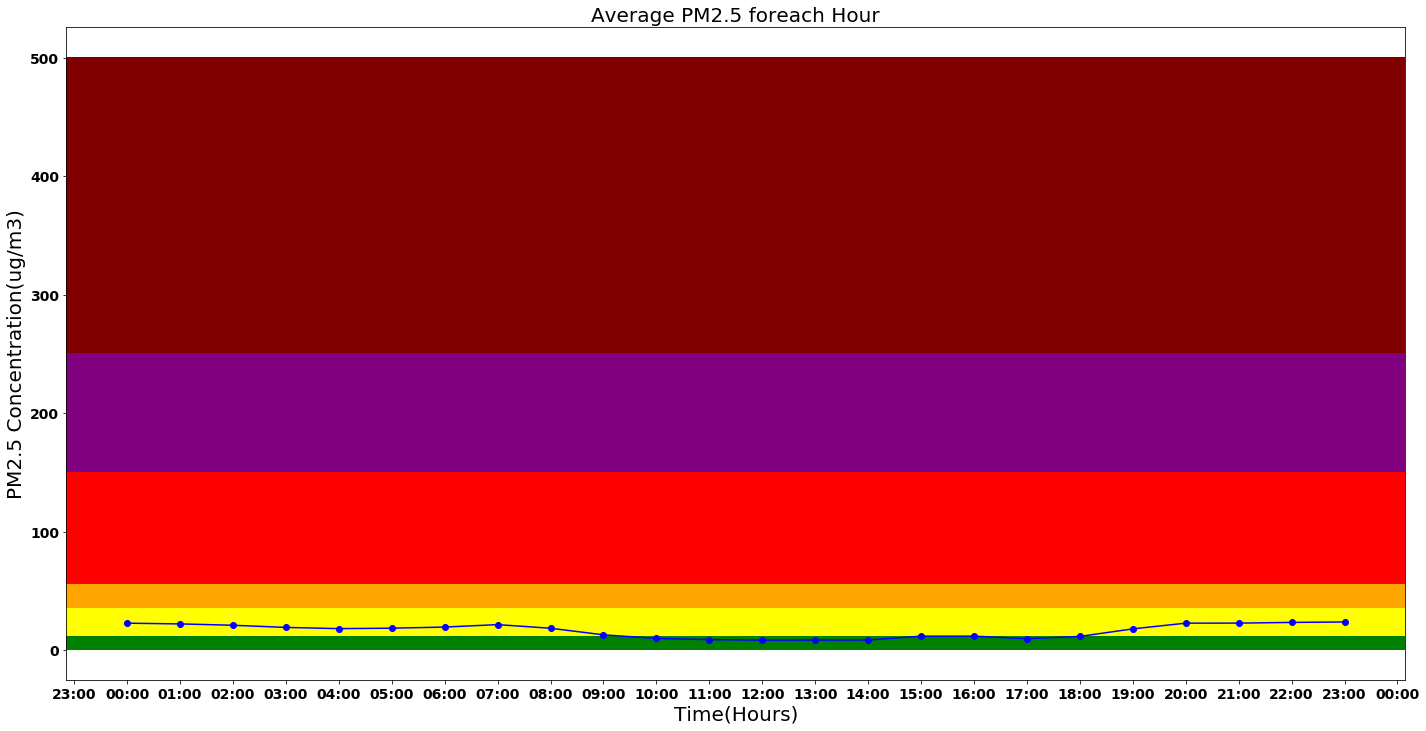

In [544]:
y_axis_values = average_pm25_concentration_for_each_hour_of_day['PM2.5(Ug/m3)'].values
x_axis_values = average_pm25_concentration_for_each_hour_of_day['TimeStamp'].values
x_axis_label = 'Time(Hours)'
y_axis_label =  'PM2.5 Concentration(ug/m3)'
chart_title  =  'Average PM2.5 foreach Hour'
file_path    =   os.path.join(filepath , 'average_pm25_foreach_hour')

make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [545]:
average_pm25_trend_for_each_hour = go.Scatter(x=average_pm25_concentration_for_each_hour_of_day['TimeStamp'].values,
                         y = average_pm25_concentration_for_each_hour_of_day['PM2.5(Ug/m3)'].values) 

layout = go.Layout(title='Average PM2.5 foreach Hour', xaxis=dict(title='Hour'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[average_pm25_trend_for_each_hour], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'average_pm25_concentration_trend_for_each_hour.png'))

### Save the resampled pm2.5 concentration

In [546]:
daily_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'daily_average_pm25_concentration.csv'))
monthly_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'monthly_average_pm25_concentration.csv'))
hourly_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'hourly_average_pm25_concentration.csv'))
average_pm25_concentration_for_each_hour_of_day.to_csv(os.path.join(filepath , 'average_pm25_concentration_for_each_hour_of_day.csv'))

daily_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'daily_average_pm25_concentration_analysis.csv'))
monthly_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'monthly_average_pm25_concentration_analysis.csv'))
hourly_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'hourly_average_pm25_concentration_analysis.csv'))

### Data analysis daily  airquality dataset

In [547]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(644, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 2017-07-01 to 2019-04-05
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      644 non-null float64
PM2.5(Ug/m3)    644 non-null float64
PM10(Ug/m3)     644 non-null float64
dtypes: float64(3)
memory usage: 20.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


### Show Histogram Distributions for the concentrations

<Figure size 1152x576 with 0 Axes>

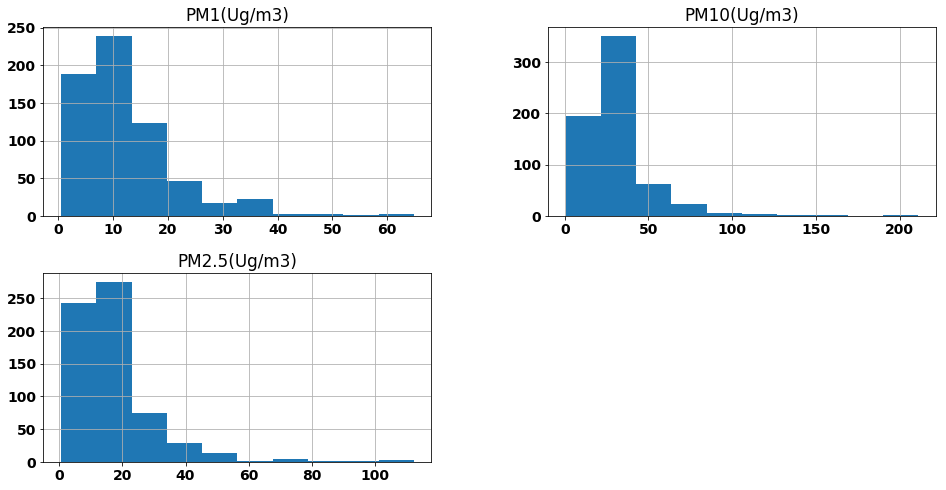

In [548]:
plt.figure(figsize=(16,8))
daily_average_airquality_data_concentrations.hist()
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_historgram.png"))

In [549]:
daily_average_airquality_data_concentrations.head(100)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-07-01,14.110,21.520,50.040
2017-07-02,34.350,49.050,114.030
2017-07-03,21.070,26.820,48.240
2017-07-04,15.510,22.610,43.630
2017-07-05,22.630,31.800,55.220
2017-07-06,11.220,15.770,39.040
2017-07-07,4.950,7.850,18.450
2017-07-08,9.515,17.410,114.890
2017-07-09,14.080,26.970,211.330


In [550]:
daily_average_airquality_data_concentrations.tail(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2019-03-27,11.14,14.040,21.790
2019-03-28,5.62,6.780,9.310
2019-03-29,7.08,8.910,13.960
2019-03-30,8.55,10.710,16.220
2019-03-31,4.80,6.180,10.680
2019-04-01,4.68,6.045,10.565
2019-04-02,4.68,6.045,10.565
2019-04-03,4.56,5.910,10.450
2019-04-04,4.93,6.590,11.600


In [551]:
#daily_airquality_data_concentrations.info()

### Plot the daily airquality data concentrations 

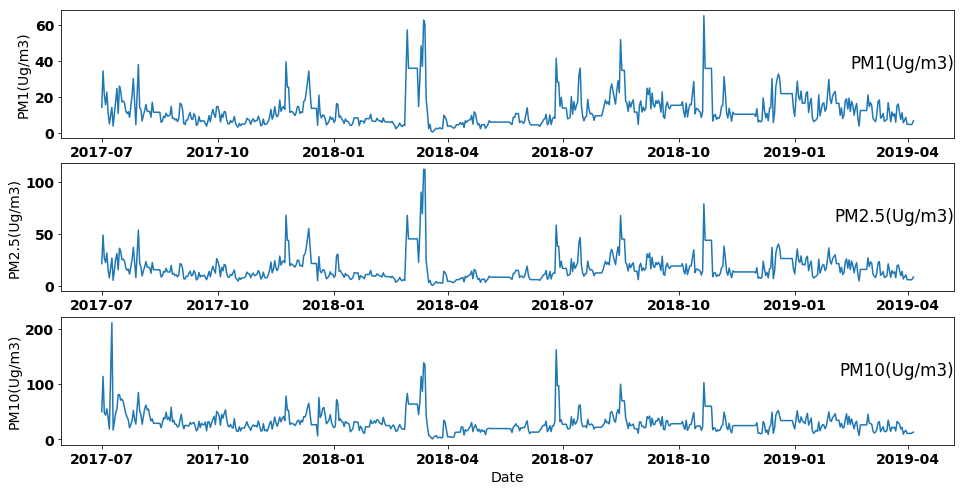

In [552]:
values = daily_average_airquality_data_concentrations.values
# specify columns to plot
groups = [0,1,2]
i = 1
# plot each column

plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(daily_average_airquality_data_concentrations.index,values[:, group])
    plt.title(daily_average_airquality_data_concentrations.columns[group], loc='right', y=0.5)
    plt.xlabel('Date')
    plt.ylabel(daily_average_airquality_data_concentrations.columns[group])
    i += 1
    
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_linegraph.png"))
plt.show()

In [553]:
values.shape

(644, 3)

### Plotting the airquality timeseries

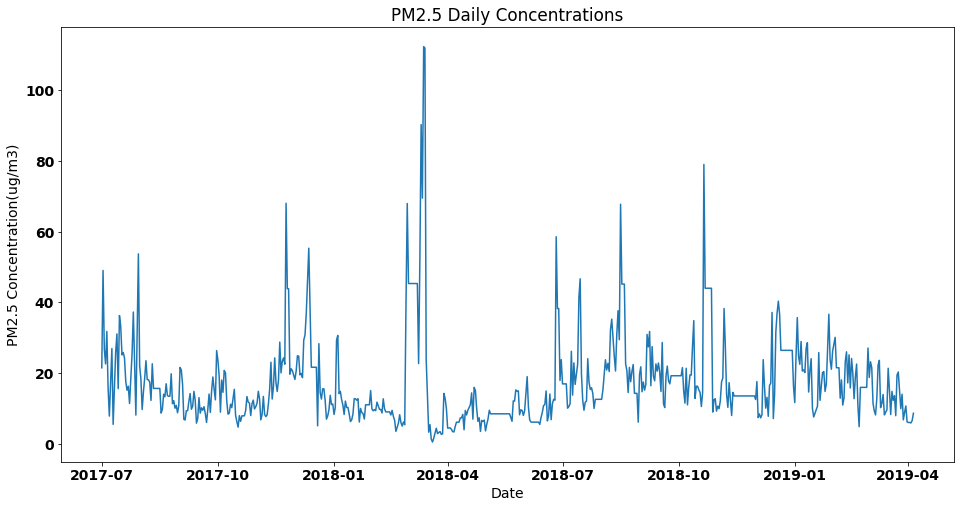

In [554]:
airquality_pm25_values = values[:, 1]
plt.figure(figsize=(16,8))
plt.plot(daily_average_airquality_data_concentrations.index, airquality_pm25_values)
plt.title('PM2.5 Daily Concentrations')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration(ug/m3)')
plt.savefig(os.path.join(filepath ,"daily_average_pm25_concentration_trend_linegraph.png"))
plt.show()

### Getting the date of the first and last record of the daily airquality dataset
This is essential to understand the date range for records from meteorology that shall be merged to this dataset

In [555]:
## get the lower boundary date from the daily airquality dataset
daily_average_airquality_data_concentrations.iloc[:1,:]
t= daily_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
daily_average_airquality_data_lower_boundary_date = z.strftime('%Y-%m-%d')

print(daily_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the daily airquality dataset
t = daily_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
daily_average_airquality_data_upper_boundary_date = z.strftime('%Y-%m-%d')
print(daily_average_airquality_data_upper_boundary_date)



2017-07-01
2019-04-05


### Getting the datetime of the first and last record of the hourly airquality dataset

In [556]:
## get the lower boundary date from the hourly airquality dataset
hourly_average_airquality_data_concentrations.iloc[:1,:]
h= hourly_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
h = h.astype(datetime.datetime)
y= pd.to_datetime(h)
hourly_average_airquality_data_lower_boundary_date = y.strftime('%Y-%m-%d %H:%M:%S')
  
print(hourly_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the hourly airquality dataset
h = hourly_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
h = h.astype(datetime.datetime)
y= pd.to_datetime(h)
hourly_average_airquality_data_upper_boundary_date = y.strftime('%Y-%m-%d %H:%M:%S')
print(hourly_average_airquality_data_upper_boundary_date)

2017-07-01 00:00:00
2019-04-05 14:00:00


### Analysing the relationship among the airpollutant concentrations in relation to pm2.5
- use scatter plots to determine the extent of correlation and sense of correlation between pm2.5 and other air pollutant concentrations i.e pm1, pm10, co, so2.

- this can be acomplished used sns pairplot or matplot pair plot for each pair of variables.

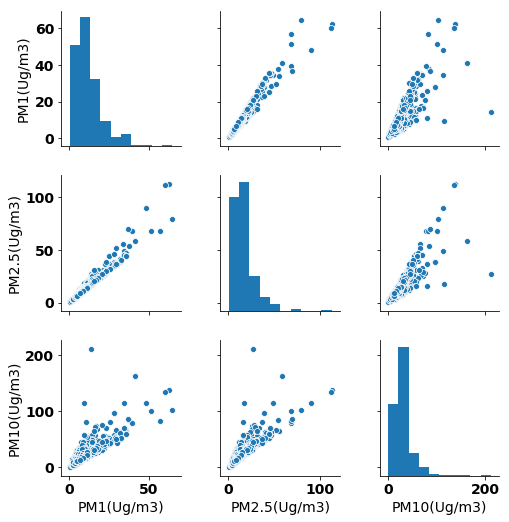

In [557]:
import seaborn as sns;
sns.pairplot(daily_average_airquality_data_concentrations)
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_pairplot_corr.png"))
plt.show()

In [558]:
daily_average_airquality_data_concentrations.corr()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
PM1(Ug/m3),1.000000,0.970677,0.767894
PM2.5(Ug/m3),0.970677,1.000000,0.815567
PM10(Ug/m3),0.767894,0.815567,1.000000


### Read in the Meteorological data for preprocessing it
- read in dataset
- display first 10 records
- display last 10 records
- display dataset summary i.e shape, column names, info and datatypes for each column
- generate and display descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s  distribution

In [559]:
daily_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_daily.csv')
monthly_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_monthly.csv')
hourly_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_hourly.csv')
daily_tahmo_unma_rainfall_comparison_data = pd.read_csv('data/Met/tahmo_unma_rainfall_comparison_daily.csv')
daily_meteorological_data.head(10)

,site,name,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
0,TA00216,Makerere Synoptic,2017-09-09,86.22,0.00,87.666,0.00,20.92,19.78,22.72,SE,0.59,0.29,1.19
1,TA00216,Makerere Synoptic,2017-09-10,78.17,0.00,87.715,3575.39,21.91,18.57,26.37,NE,0.60,0.31,1.41
2,TA00216,Makerere Synoptic,2017-09-11,75.27,1.77,87.657,4600.25,23.05,17.99,28.23,NE,0.69,0.44,1.27
3,TA00216,Makerere Synoptic,2017-09-13,90.00,0.00,87.730,0.00,20.46,20.46,20.46,E,0.91,0.91,0.91
4,TA00216,Makerere Synoptic,2017-09-24,78.17,0.00,87.780,4839.53,22.02,18.40,27.86,SE,0.88,0.30,1.63
5,TA00216,Makerere Synoptic,2017-09-25,80.21,7.88,87.627,4820.36,21.65,17.37,28.59,E,0.70,0.39,1.03
6,TA00216,Makerere Synoptic,2017-09-26,90.25,0.00,87.645,0.00,19.60,18.55,20.83,N,0.62,0.19,1.23
7,TA00216,Makerere Synoptic,2017-10-31,84.50,1.07,87.665,0.00,20.55,18.64,21.39,NE,0.95,0.71,1.24
8,TA00216,Makerere Synoptic,2017-11-01,73.00,1.67,87.624,4707.15,23.25,18.10,28.83,SE,0.69,0.32,1.38
9,TA00216,Makerere Synoptic,2017-11-02,74.96,0.02,87.610,4683.44,22.99,19.15,28.99,W,0.66,0.22,1.28


### comparison of UNMA and tahmo daily rainfall dataset

In [560]:
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data)
daily_tahmo_unma_rainfall_comparison_data_without_missing_records =  daily_tahmo_unma_rainfall_comparison_data.dropna()
daily_tahmo_unma_rainfall_comparison_data_without_missing_records["Date"] = pd.to_datetime(daily_tahmo_unma_rainfall_comparison_data_without_missing_records["Date"])
daily_tahmo_unma_rainfall_comparison_data_without_missing_values = daily_tahmo_unma_rainfall_comparison_data_without_missing_records.set_index('Date')
print(daily_tahmo_unma_rainfall_comparison_data.head(3))
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data_without_missing_values)

(365, 3)
['Date', 'Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date     365 non-null object
Tahmo    365 non-null float64
UNMA     335 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 Date      object
Tahmo    float64
UNMA     float64
dtype: object
         Date  Tahmo  UNMA
0  2018-01-01   0.00   0.0
1  2018-01-02   0.06   0.0
2  2018-01-03   0.06   0.0
(335, 2)
['Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2018-01-01 to 2018-12-31
Data columns (total 2 columns):
Tahmo    335 non-null float64
UNMA     335 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 Tahmo    float64
UNMA     float64
dtype: object


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [561]:
daily_tahmo_unma_rainfall_comparison_data_without_missing_values.head()

,Tahmo,UNMA
Date,,
2018-01-01,0.00,0.0
2018-01-02,0.06,0.0
2018-01-03,0.06,0.0
2018-01-04,0.02,0.0
2018-01-05,0.08,0.0


In [562]:
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data)

(365, 3)
['Date', 'Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date     365 non-null object
Tahmo    365 non-null float64
UNMA     335 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 Date      object
Tahmo    float64
UNMA     float64
dtype: object


### Correlation between rainfall observations from unma and tahmo

In [563]:
daily_tahmo_unma_rainfall_comparison_data_correlations= daily_tahmo_unma_rainfall_comparison_data_without_missing_values.corr()
daily_tahmo_unma_rainfall_comparison_data_correlations.to_csv(os.path.join(filepath, 'daily_tahmo_unma_rainfall_comparison_data_correlations.csv'))
daily_tahmo_unma_rainfall_comparison_data_correlations

,Tahmo,UNMA
Tahmo,1.000000,0.598427
UNMA,0.598427,1.000000


### Line graphs showing comparison of rainfall dataset from unma and tahmo

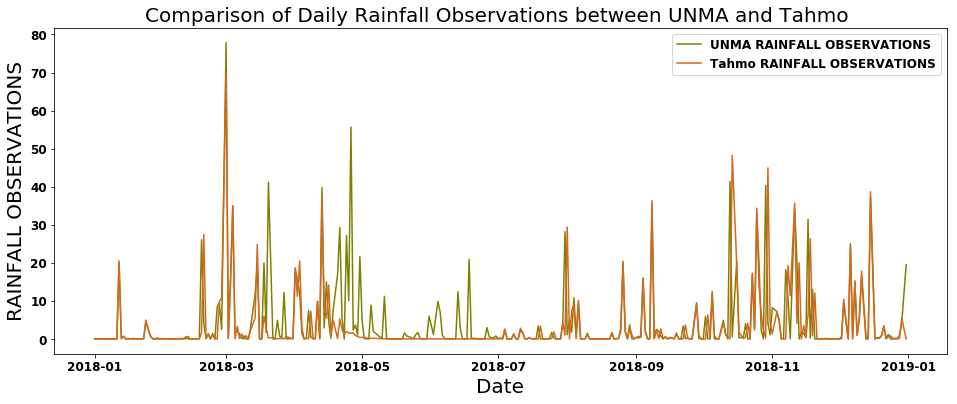

In [564]:
    fig = plt.figure(figsize=(16,6))
    plt.rcParams.update({'font.size':12, 'font.weight':'bold'})
    plt.plot(daily_tahmo_unma_rainfall_comparison_data_without_missing_values.index, 
             daily_tahmo_unma_rainfall_comparison_data_without_missing_values['UNMA'], 
             color='olive',  linestyle='solid', label='UNMA RAINFALL OBSERVATIONS')
    plt.plot(daily_tahmo_unma_rainfall_comparison_data_without_missing_values.index, 
             daily_tahmo_unma_rainfall_comparison_data_without_missing_values['Tahmo'], 
             color='chocolate', linestyle='solid', label='Tahmo RAINFALL OBSERVATIONS')
   
    #marker='o', marker='x',
    chart_title =  'Comparison of Daily Rainfall Observations between UNMA and Tahmo '
    plt.title(chart_title,fontsize=20)
    plt.ylabel('RAINFALL OBSERVATIONS', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    #plt.margins(0.1)
    plt.legend()
    plt.show()
    path_to_save_file = os.path.join('data','Met')
    fig.savefig(os.path.join( path_to_save_file , 'daily_tahmo_unma_rainfall_comparison_data.png'))

In [565]:
daily_meteorological_data.tail()

,site,name,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
593,TA00216,Makerere Synoptic,2019-06-09,93.25,3.05,87.995,2095.98,20.35,18.81,22.08,E,0.60,0.17,1.24
594,TA00216,Makerere Synoptic,2019-06-10,90.79,3.46,87.899,2638.94,20.31,18.18,23.09,SE,0.46,0.13,1.04
595,TA00216,Makerere Synoptic,2019-06-11,91.08,2.62,87.943,2438.25,20.33,18.74,24.11,E,0.45,0.13,1.30
596,TA00216,Makerere Synoptic,2019-06-12,85.38,0.68,87.939,4209.44,21.48,18.47,24.75,S,0.56,0.19,1.14
597,TA00216,Makerere Synoptic,2019-06-13,94.42,40.87,87.959,2911.88,20.48,18.38,24.14,NW,0.45,0.15,1.01


In [566]:
show_dataframe_info(daily_meteorological_data)

(598, 14)
['site', 'name', 'day', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'min temperature (oC)', 'max temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 14 columns):
site                         598 non-null object
name                         598 non-null object
day                          598 non-null object
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
min temperature (oC)         598 non-null float64
max temperature (oC)         598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-n

In [567]:
daily_meteorological_data.describe()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,77.957742,3.514799,87.685090,3812.510151,22.548880,18.738077,27.798278,0.910635,0.293629,2.367040
std,12.450630,8.703987,0.137135,1200.251535,1.436224,1.096167,2.214626,0.696541,0.137036,4.194134
min,0.000000,0.000000,87.313000,0.000000,17.910000,15.470000,19.680000,0.420000,0.000000,0.680000
25%,74.510000,0.000000,87.589000,2986.087500,21.560000,18.012500,26.550000,0.632500,0.220000,1.170000
50%,79.540000,0.100000,87.675000,3892.755000,22.540000,18.700000,27.790000,0.730000,0.280000,1.355000
75%,84.617500,1.987500,87.775000,4723.055000,23.580000,19.417500,29.200000,0.897500,0.360000,1.830000
max,98.290000,69.870000,88.015000,7245.040000,26.380000,21.610000,33.370000,12.400000,1.240000,36.910000


### Drop columns from daily,hourly and monthly meteorological dataset (tahmo) that shall not be used during analysis

### daily
- site 
- name
- max temperature
- min temperature

### hourly
- site 
- name

### monthly
- site 
- name
- min windspeed(m/s)
- max windspeed(m/s)

In [568]:
daily_meteorological_data_of_interest = daily_meteorological_data.drop(
    ['site','name','min temperature (oC)','max temperature (oC)'], axis=1)

hourly_meteorological_data_of_interest = hourly_meteorological_data.drop(['site','name'], axis=1)

monthly_meteorological_data_of_interest = monthly_meteorological_data.drop(
    ['site','name','min temperature (oC)','max temperature (oC)','max windspeed (m/s)','min windspeed (m/s)'], axis=1)

In [569]:
daily_meteorological_data_of_interest.head()

,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
0,2017-09-09,86.22,0.00,87.666,0.00,20.92,SE,0.59,0.29,1.19
1,2017-09-10,78.17,0.00,87.715,3575.39,21.91,NE,0.60,0.31,1.41
2,2017-09-11,75.27,1.77,87.657,4600.25,23.05,NE,0.69,0.44,1.27
3,2017-09-13,90.00,0.00,87.730,0.00,20.46,E,0.91,0.91,0.91
4,2017-09-24,78.17,0.00,87.780,4839.53,22.02,SE,0.88,0.30,1.63


In [570]:
show_dataframe_info(daily_meteorological_data_of_interest)

(598, 10)
['day', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 10 columns):
day                          598 non-null object
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-null float64
min windspeed (m/s)          598 non-null float64
max windspeed (m/s)          598 non-null float64
dtypes: float64(8), object(2)
memory usage: 46.8+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 day                           object
aver

In [571]:
hourly_meteorological_data.head()

,site,name,dateTimeUTC,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s)
0,TA00216,Makerere Synoptic,2017-09-09 15:00:00,73,0.0,87.50,0.9,23.27,SE,0.44
1,TA00216,Makerere Synoptic,2017-09-09 16:00:00,77,0.0,87.58,0.0,22.72,NE,0.38
2,TA00216,Makerere Synoptic,2017-09-09 17:00:00,80,0.0,87.67,0.0,22.29,SE,0.37
3,TA00216,Makerere Synoptic,2017-09-09 18:00:00,82,0.0,87.66,0.0,21.71,N,0.34
4,TA00216,Makerere Synoptic,2017-09-09 19:00:00,87,0.0,87.68,0.0,20.86,NE,0.29


In [572]:
show_dataframe_info(hourly_meteorological_data)

(14288, 10)
['site', 'name', 'dateTimeUTC', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'winddirection', 'windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14288 entries, 0 to 14287
Data columns (total 10 columns):
site                  14288 non-null object
name                  14288 non-null object
dateTimeUTC           14288 non-null object
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
winddirection         14288 non-null object
windspeed (m/s)       14288 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.1+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 site                   object
name                   object
dateTimeUTC            object
humidity (%)            int64
precipitation (mm)    float64
pre

In [573]:
monthly_meteorological_data_of_interest.head()

,month,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
0,2017-09,79.55,9.65,87.693,17835.53,21.85,E,0.70
1,2017-10,84.50,1.07,87.665,0.00,20.55,NE,0.95
2,2017-11,79.95,216.68,87.636,118238.95,22.05,E,0.69
3,2017-12,73.99,27.74,87.592,124474.15,23.17,S,0.79
4,2018-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [574]:
show_dataframe_info(monthly_meteorological_data)

(21, 14)
['site', 'name', 'month', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'min temperature (oC)', 'max temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
site                         21 non-null object
name                         21 non-null object
month                        21 non-null object
average humidity (%)         21 non-null float64
total rainfall (mm)          21 non-null float64
average pressure (kPa)       21 non-null float64
total radiation (W/m2)       21 non-null float64
average temperature (oC)     21 non-null float64
min temperature (oC)         21 non-null float64
max temperature (oC)         21 non-null float64
predominant winddirection    21 non-null object
average windspeed (m/s)      21 non-null float64
m

###  Set the day column to be the index for the daily meteorological dataset
- parse the  day column into datetime.
- set the  day column to be the index for the dataframe.

### set the dateTimeUTC to be the index of the hourly meteorological dataset
- parse the  dateTimeUTC column into datetime.
- set the  dateTimeUTC column to be the index for the dataframe.
- change the hourly data from UTC to EAT(Nairobi) ugandanda time.

In [575]:
daily_meteorological_data_of_interest["day"] = pd.to_datetime(daily_meteorological_data_of_interest["day"])
daily_meteorological_data_values  = daily_meteorological_data_of_interest.set_index('day')


monthly_meteorological_data_of_interest["month"] = pd.to_datetime(monthly_meteorological_data_of_interest["month"])
monthly_meteorological_data_values = monthly_meteorological_data_of_interest.set_index('month')

hourly_meteorological_data_of_interest["dateTimeUTC"] = pd.to_datetime(hourly_meteorological_data_of_interest["dateTimeUTC"])
hourly_meteorological_data_of_interest["dateTime"] = hourly_meteorological_data_of_interest["dateTimeUTC"] + datetime.timedelta(hours=3)
hourly_meteorological_data_values = hourly_meteorological_data_of_interest.set_index('dateTime')
hourly_meteorological_data_values = hourly_meteorological_data_values.drop(['dateTimeUTC'], axis=1)


### Data Analysis on Monthly Meteorological data

In [576]:
monthly_meteorological_data_values.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
month,,,,,,,
2017-09-01,79.55,9.65,87.693,17835.53,21.85,E,0.70
2017-10-01,84.50,1.07,87.665,0.00,20.55,NE,0.95
2017-11-01,79.95,216.68,87.636,118238.95,22.05,E,0.69
2017-12-01,73.99,27.74,87.592,124474.15,23.17,S,0.79
2018-01-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [577]:
show_dataframe_info(monthly_meteorological_data_values)

(21, 7)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2017-09-01 to 2019-05-01
Data columns (total 7 columns):
average humidity (%)         21 non-null float64
total rainfall (mm)          21 non-null float64
average pressure (kPa)       21 non-null float64
total radiation (W/m2)       21 non-null float64
average temperature (oC)     21 non-null float64
predominant winddirection    21 non-null object
average windspeed (m/s)      21 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.3+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 average humidity (%)         float64
total rainfall (mm)          float64
average pressure (kPa)       float64
total radiation (W/m2)       float64
average temperature (oC)     float64
predominant winddirection     object
average windsp

### Show histogram distributions for the monthly meteorological data

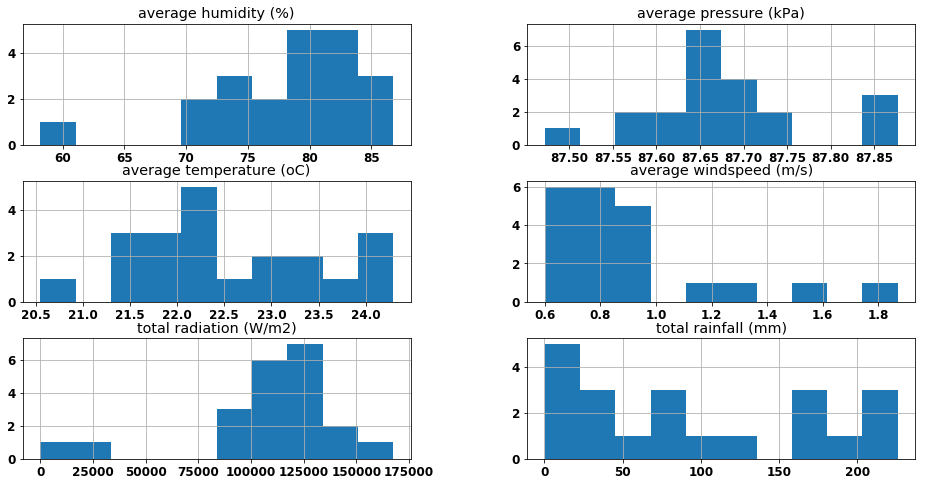

In [578]:
monthly_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"monthly_meteorological_data_historgram.png"))
plt.show()

### Data analysis on daily meteorological dataset

In [579]:
show_dataframe_info(daily_meteorological_data_values)

(598, 9)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2017-09-09 to 2019-06-13
Data columns (total 9 columns):
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-null float64
min windspeed (m/s)          598 non-null float64
max windspeed (m/s)          598 non-null float64
dtypes: float64(8), object(1)
memory usage: 46.7+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 average humidity (%)         float64
total rainfall (mm)          float64
averag

### Show histogram distributions for the daily meteorology data

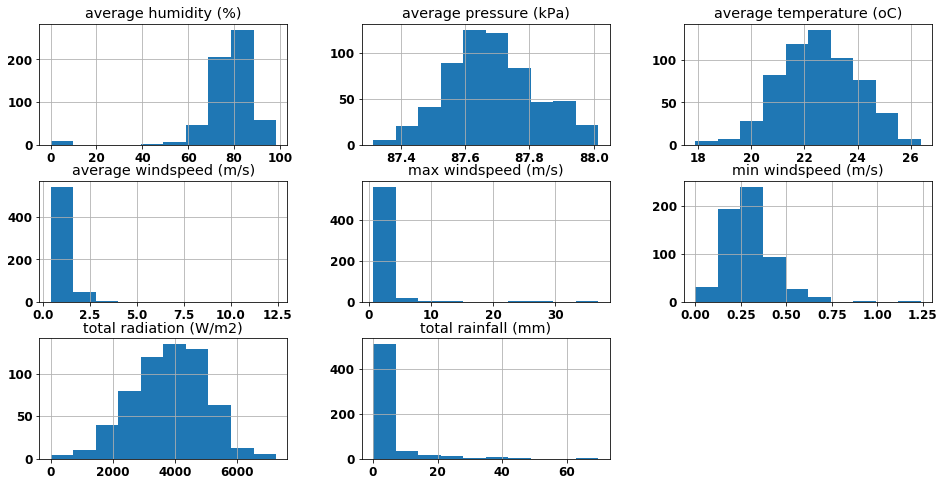

In [580]:
daily_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"daily_meteorological_data_historgram.png"))
plt.show()

In [581]:
daily_meteorological_data_values.head(10)

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
day,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,SE,0.59,0.29,1.19
2017-09-10,78.17,0.00,87.715,3575.39,21.91,NE,0.60,0.31,1.41
2017-09-11,75.27,1.77,87.657,4600.25,23.05,NE,0.69,0.44,1.27
2017-09-13,90.00,0.00,87.730,0.00,20.46,E,0.91,0.91,0.91
2017-09-24,78.17,0.00,87.780,4839.53,22.02,SE,0.88,0.30,1.63
2017-09-25,80.21,7.88,87.627,4820.36,21.65,E,0.70,0.39,1.03
2017-09-26,90.25,0.00,87.645,0.00,19.60,N,0.62,0.19,1.23
2017-10-31,84.50,1.07,87.665,0.00,20.55,NE,0.95,0.71,1.24
2017-11-01,73.00,1.67,87.624,4707.15,23.25,SE,0.69,0.32,1.38


### Show histogram distributions for the hourly meteorological data

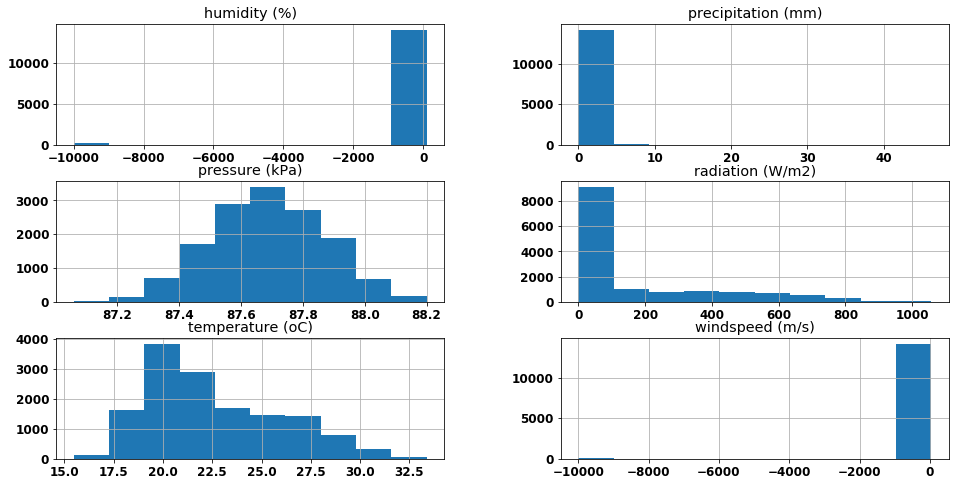

In [582]:
hourly_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"hourly_meteorological_data_historgram.png"))
plt.show()

### One Hot Encoding Categorical features (WindDirection)

In [583]:
daily_meteorological_data_values_onehot =  daily_meteorological_data_values.copy()
daily_meteorological_data_values_onehot = pd.get_dummies( daily_meteorological_data_values_onehot, columns=['predominant winddirection'], prefix = ['winddirection'])

daily_meteorological_data_values_onehot.head()
show_dataframe_info(daily_meteorological_data_values_onehot)

(598, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2017-09-09 to 2019-06-13
Data columns (total 16 columns):
average humidity (%)        598 non-null float64
total rainfall (mm)         598 non-null float64
average pressure (kPa)      598 non-null float64
total radiation (W/m2)      598 non-null float64
average temperature (oC)    598 non-null float64
average windspeed (m/s)     598 non-null float64
min windspeed (m/s)         598 non-null float64
max windspeed (m/s)         598 non-null float64
winddirection_E             598 non-null uint8
winddirection_N             598 non-null uint8
winddirection_NE       

In [584]:
hourly_meteorological_data_values_onehot =  hourly_meteorological_data_values.copy()
hourly_meteorological_data_values_onehot = pd.get_dummies( hourly_meteorological_data_values_onehot, columns=['winddirection'], prefix = ['winddirection'])

hourly_meteorological_data_values_onehot.head()
show_dataframe_info(hourly_meteorological_data_values_onehot)

(14288, 14)
['humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14288 entries, 2017-09-09 18:00:00 to 2019-06-15 02:00:00
Data columns (total 14 columns):
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
windspeed (m/s)       14288 non-null float64
winddirection_E       14288 non-null uint8
winddirection_N       14288 non-null uint8
winddirection_NE      14288 non-null uint8
winddirection_NW      14288 non-null uint8
winddirection_S       14288 non-null uint8
winddirection_SE      14288 non-null uint8
winddirection_SW      14288 non-null uint8
win

### Obtaining Meteorology data in the same date range as airquality data

In [585]:
daily_meteorological_data_in_same_daterange_with_daily_airquality_data= daily_meteorological_data_values_onehot[daily_average_airquality_data_lower_boundary_date : daily_average_airquality_data_upper_boundary_date]
hourly_meteorological_data_in_same_daterange_with_daily_airquality_data= hourly_meteorological_data_values_onehot[hourly_average_airquality_data_lower_boundary_date : hourly_average_airquality_data_upper_boundary_date]

In [586]:
daily_meteorological_data_in_same_daterange_with_daily_airquality_data.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
day,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0


In [587]:
show_dataframe_info(daily_meteorological_data_in_same_daterange_with_daily_airquality_data)

(529, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529 entries, 2017-09-09 to 2019-04-05
Data columns (total 16 columns):
average humidity (%)        529 non-null float64
total rainfall (mm)         529 non-null float64
average pressure (kPa)      529 non-null float64
total radiation (W/m2)      529 non-null float64
average temperature (oC)    529 non-null float64
average windspeed (m/s)     529 non-null float64
min windspeed (m/s)         529 non-null float64
max windspeed (m/s)         529 non-null float64
winddirection_E             529 non-null uint8
winddirection_N             529 non-null uint8
winddirection_NE       

#### Handle missing data in daily meteorology data by filling NaN with the Mean of each column

In [588]:
daily_meteorological_data_with_out_missing_values =daily_meteorological_data_in_same_daterange_with_daily_airquality_data
#daily_meteorological_data_with_out_missing_values.fillna(daily_meteorological_data_with_out_missing_values.mean(),inplace=True)
show_dataframe_info(daily_meteorological_data_with_out_missing_values)

(529, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529 entries, 2017-09-09 to 2019-04-05
Data columns (total 16 columns):
average humidity (%)        529 non-null float64
total rainfall (mm)         529 non-null float64
average pressure (kPa)      529 non-null float64
total radiation (W/m2)      529 non-null float64
average temperature (oC)    529 non-null float64
average windspeed (m/s)     529 non-null float64
min windspeed (m/s)         529 non-null float64
max windspeed (m/s)         529 non-null float64
winddirection_E             529 non-null uint8
winddirection_N             529 non-null uint8
winddirection_NE       

### Plot the daily meteorology data values for the time series

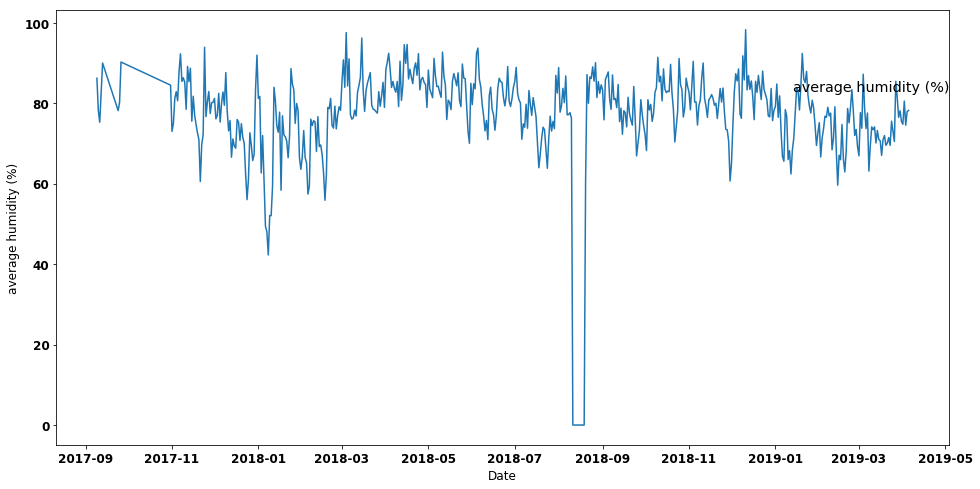

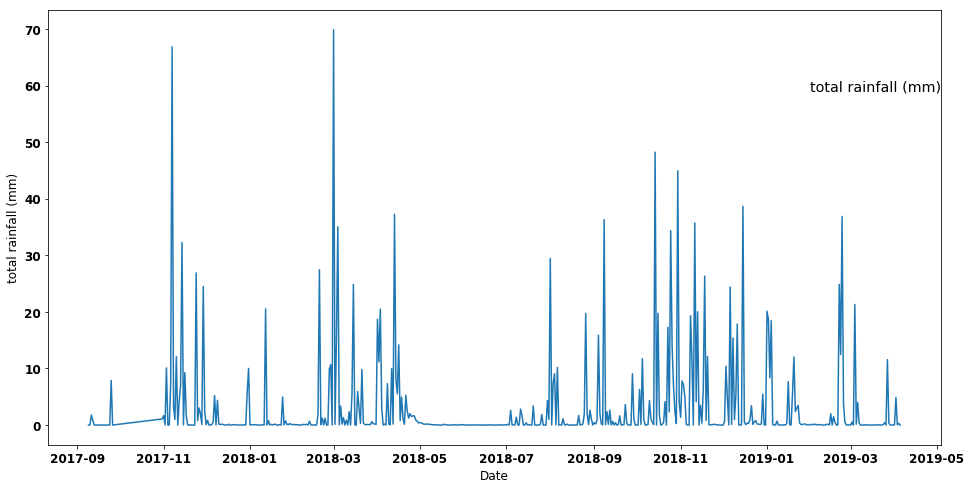

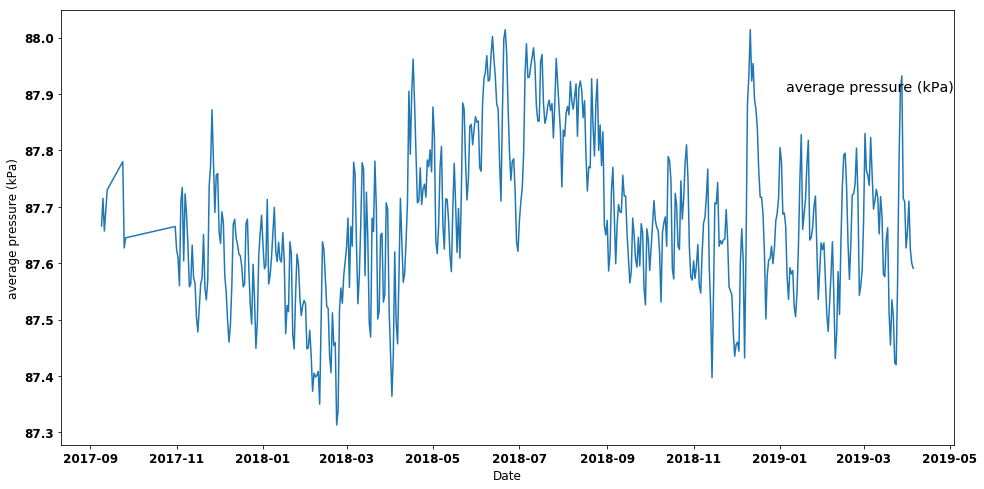

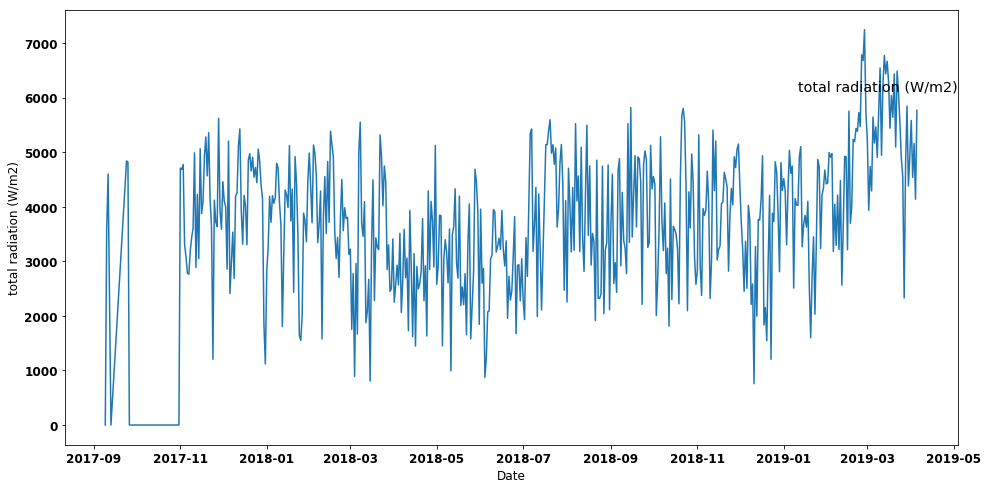

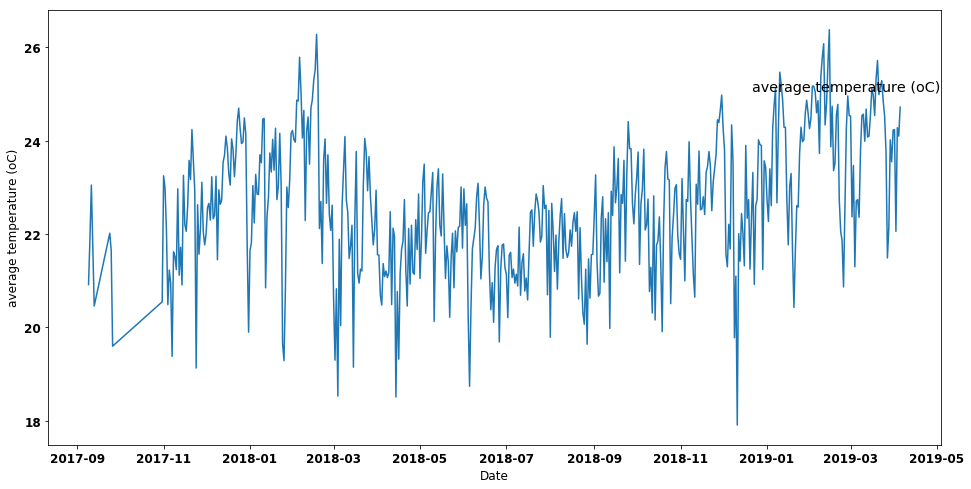

In [589]:
meteorological_values = daily_meteorological_data_with_out_missing_values.values
# specify columns to plot
groups = [0,1,2, 3, 4]
i = 1
# plot each column

plt.figure()
for group in groups:
    #plt.subplot(len(groups), 1, i)
    plt.plot(daily_meteorological_data_with_out_missing_values.index,meteorological_values[:, group])
    plt.title(daily_meteorological_data_with_out_missing_values.columns[group], loc='right', y=0.8)
    plt.xlabel('Date')
    plt.ylabel(daily_meteorological_data_with_out_missing_values.columns[group])
    #i += 1
    plt.show()

### Vegetation Index (greenness Dataset)

In [590]:
show_dataframe_info(vi_data)                      

(28, 28)
['Latitude', 'Longitude', 'Date', 'MODIS_Tile', 'MOD13A3_006_Line_Y_1km', 'MOD13A3_006_Sample_X_1km', 'MOD13A3_006__1_km_monthly_EVI', 'MOD13A3_006__1_km_monthly_NDVI', 'MOD13A3_006__1_km_monthly_VI_Quality', 'MOD13A3_006__1_km_monthly_VI_Quality_bitmask', 'MOD13A3_006__1_km_monthly_VI_Quality_MODLAND', 'MOD13A3_006__1_km_monthly_VI_Quality_MODLAND_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_VI_Usefulness', 'MOD13A3_006__1_km_monthly_VI_Quality_VI_Usefulness_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Aerosol_Quantity', 'MOD13A3_006__1_km_monthly_VI_Quality_Aerosol_Quantity_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Adjacent_cloud_detected', 'MOD13A3_006__1_km_monthly_VI_Quality_Adjacent_cloud_detected_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Atmosphere_BRDF_Correction', 'MOD13A3_006__1_km_monthly_VI_Quality_Atmosphere_BRDF_Correction_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Mixed_Clouds', 'MOD13A3_006__1_km_monthly_VI_Quality_Mix

In [591]:
vi_mask = vi_data.dtypes == np.float64
vi_columns = vi_data.columns[vi_mask]
vi_data_of_interest = vi_data[vi_columns]
vi_data_of_interest['TimeStamp'] = vi_data['Date']
vi_data_of_interest = vi_data_of_interest.drop(['Latitude','Longitude','MOD13A3_006_Sample_X_1km','MOD13A3_006_Line_Y_1km','MOD13A3_006__1_km_monthly_VI_Quality'], axis=1)
#vi_data_of_interest = vi_data_of_interest.drop(['Latitude','Longitude'], axis=1)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [592]:
vi_data_of_interest.head()

,MOD13A3_006__1_km_monthly_EVI,MOD13A3_006__1_km_monthly_NDVI,TimeStamp
0,0.1757,0.3019,2017-01-01
1,0.1806,0.3233,2017-02-01
2,0.2245,0.3478,2017-03-01
3,0.2139,0.3748,2017-04-01
4,0.2273,0.3969,2017-05-01


In [593]:
 vi_data_of_interest.rename(columns={'MOD13A3_006__1_km_monthly_EVI':'EVI','MOD13A3_006__1_km_monthly_NDVI':'NDVI'},inplace=True)

In [594]:
monthly_vi_data = vi_data_of_interest.set_index('TimeStamp')
monthly_vi_data_copy = monthly_vi_data.copy()
monthly_vi_data

,EVI,NDVI
TimeStamp,,
2017-01-01,0.1757,0.3019
2017-02-01,0.1806,0.3233
2017-03-01,0.2245,0.3478
2017-04-01,0.2139,0.3748
2017-05-01,0.2273,0.3969
2017-06-01,0.2061,0.3678
2017-07-01,0.1896,0.3638
2017-08-01,0.2148,0.3672
2017-09-01,0.2002,0.3660


### Analysing Relationship between PM2.5 and Greenness ( merging vi dataset and airquality dataset)

In [595]:
monthly_average_airquality_data_concentrations.head()
dates = monthly_average_airquality_data_concentrations.index
monthly_average_airquality_data_concentrations['MonthOfYear'] = pd.to_datetime(dates).strftime('%m-%Y') 
monthly_average_airquality_data_concentrations.head()

vi_dates = monthly_vi_data.index
monthly_vi_data['MonthOfYear'] = pd.to_datetime(vi_dates).strftime('%m-%Y') 

#print(monthly_average_airquality_data_concentrations.head())
#print(monthly_vi_data.head())

meteorological_monthly_dates = monthly_meteorological_data_values.index
monthly_meteorological_data_values['MonthOfYear'] = pd.to_datetime(meteorological_monthly_dates).strftime('%m-%Y') 
monthly_meteorological_data_values.head()


,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),MonthOfYear
month,,,,,,,,
2017-09-01,79.55,9.65,87.693,17835.53,21.85,E,0.70,09-2017
2017-10-01,84.50,1.07,87.665,0.00,20.55,NE,0.95,10-2017
2017-11-01,79.95,216.68,87.636,118238.95,22.05,E,0.69,11-2017
2017-12-01,73.99,27.74,87.592,124474.15,23.17,S,0.79,12-2017
2018-01-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90,01-2018


In [596]:
## get the lower boundary date from the monthly airquality dataset
monthly_average_airquality_data_concentrations.iloc[:1,:]
first_record= monthly_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
first_record = first_record.astype(datetime.datetime)
x= pd.to_datetime(first_record)
monthly_average_airquality_data_lower_boundary_date = x.strftime('%m-%Y')
 
print(monthly_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the monthly airquality dataset
last_record = monthly_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
last_record = last_record.astype(datetime.datetime)
y = pd.to_datetime(last_record)
monthly_average_airquality_data_upper_boundary_date = y.strftime('%m-%Y')
print(monthly_average_airquality_data_upper_boundary_date)


monthly_combined_airquality_vi_dataset= pd.merge(monthly_average_airquality_data_concentrations, monthly_vi_data, on='MonthOfYear')
merged_monthly_airquality_greenness_meteorological_dataset = pd.merge(monthly_combined_airquality_vi_dataset, monthly_meteorological_data_values, on='MonthOfYear')
merged_monthly_airquality_vi_dataset = monthly_combined_airquality_vi_dataset.set_index('MonthOfYear')
merged_monthly_airquality_greenness_meteorological_dataset = merged_monthly_airquality_greenness_meteorological_dataset.set_index('MonthOfYear')

print(merged_monthly_airquality_vi_dataset.head())
merged_monthly_airquality_greenness_meteorological_dataset.head()

07-2017
04-2019
             PM1(Ug/m3)  PM2.5(Ug/m3)  PM10(Ug/m3)     EVI    NDVI
MonthOfYear                                                       
07-2017           15.57         22.34        52.98  0.1896  0.3638
08-2017            9.94         14.51        39.03  0.2148  0.3672
09-2017            8.93         12.88        29.18  0.2002  0.3660
10-2017            7.40         12.30        29.01  0.2086  0.3898
11-2017            9.82         16.76        27.67  0.2021  0.3925


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
MonthOfYear,,,,,,,,,,,,
09-2017,8.93,12.88,29.18,0.2002,0.3660,79.55,9.65,87.693,17835.53,21.85,E,0.70
10-2017,7.40,12.30,29.01,0.2086,0.3898,84.50,1.07,87.665,0.00,20.55,NE,0.95
11-2017,9.82,16.76,27.67,0.2021,0.3925,79.95,216.68,87.636,118238.95,22.05,E,0.69
12-2017,11.69,19.00,38.68,0.1908,0.3787,73.99,27.74,87.592,124474.15,23.17,S,0.79
01-2018,7.62,12.05,28.98,0.1686,0.3408,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [597]:
vi_airquality_correlations= merged_monthly_airquality_vi_dataset.corr()
vi_airquality_correlations.to_csv(os.path.join(filepath, 'vi_airquality_correlations.csv'))
vi_airquality_correlations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
PM1(Ug/m3),1.000000,0.935342,0.583015,-0.110799,-0.024196
PM2.5(Ug/m3),0.935342,1.000000,0.710965,-0.177146,-0.083334
PM10(Ug/m3),0.583015,0.710965,1.000000,-0.375133,-0.208919
EVI,-0.110799,-0.177146,-0.375133,1.000000,0.729066
NDVI,-0.024196,-0.083334,-0.208919,0.729066,1.000000


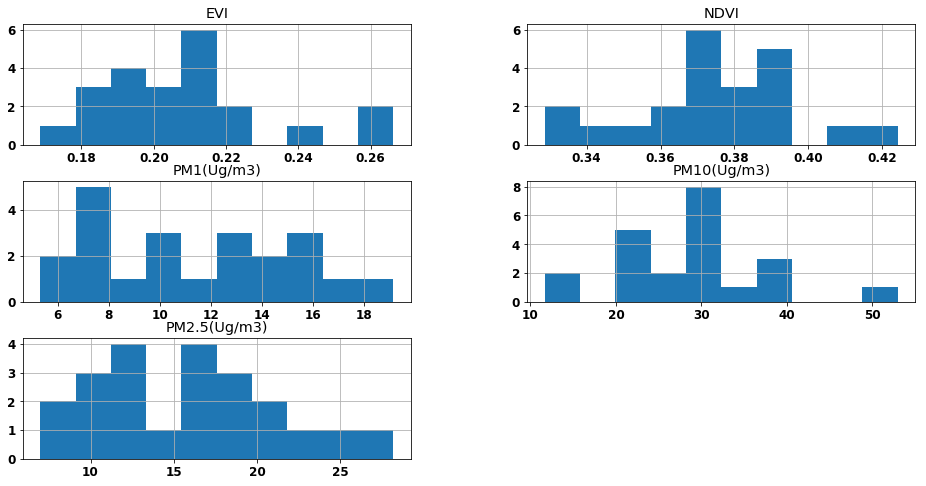

In [598]:
merged_monthly_airquality_vi_dataset_historgram = merged_monthly_airquality_vi_dataset.hist()
plt.savefig(os.path.join(filepath ,"merged_monthly_airquality_vi_dataset_historgram.png"))
plt.show()

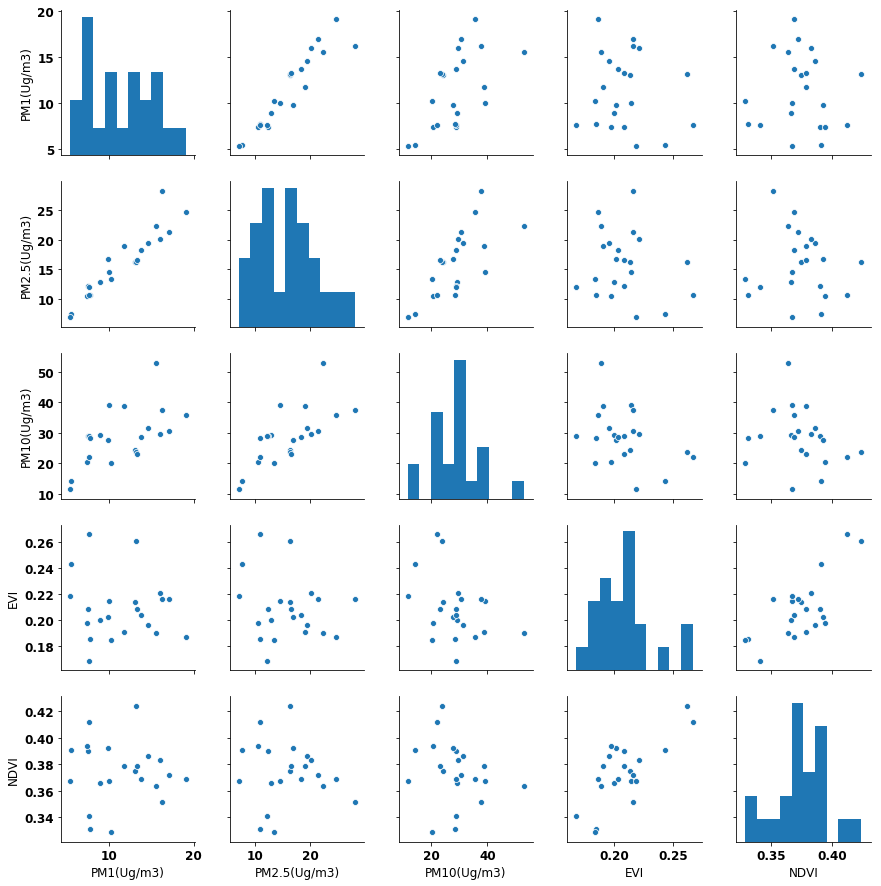

In [599]:
merged_monthly_airquality_vi_sns_plot= sns.pairplot(merged_monthly_airquality_vi_dataset)
plt.show()
merged_monthly_airquality_vi_sns_plot.savefig(os.path.join(filepath ,"merged_monthly_airquality_vi_sns_plot.png"))

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



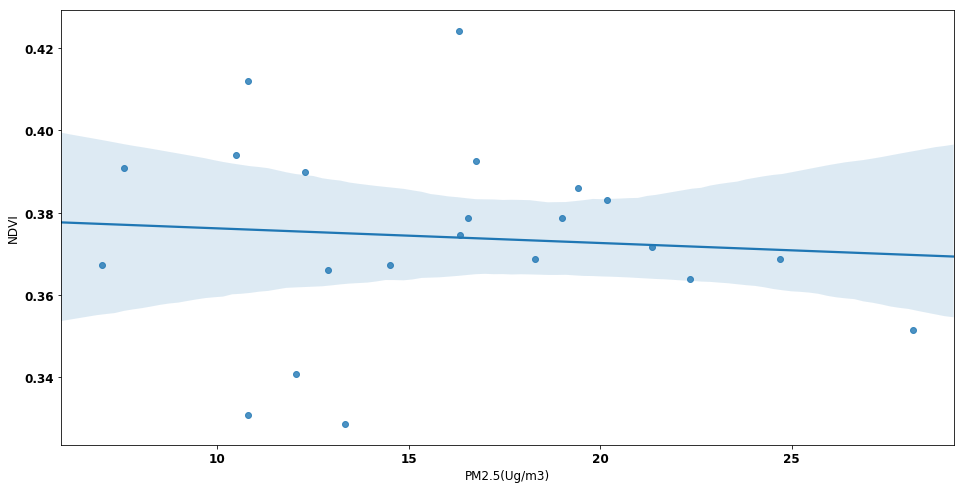

In [600]:
merged_monthly_pm25_ndvi = merged_monthly_airquality_vi_dataset[['PM2.5(Ug/m3)', 'NDVI']].copy()
merged_monthly_pm25_ndvi.head()
corr_plot = sns.regplot(merged_monthly_pm25_ndvi['PM2.5(Ug/m3)'], merged_monthly_pm25_ndvi['NDVI'])
corr_plot_figure = corr_plot.get_figure()    
corr_plot_figure.savefig(os.path.join(filepath ,"corr_pm25_vi_reg_plot.png"))

In [601]:
merged_monthly_pm25_ndvi.corr(method='pearson')

,PM2.5(Ug/m3),NDVI
PM2.5(Ug/m3),1.000000,-0.083334
NDVI,-0.083334,1.000000


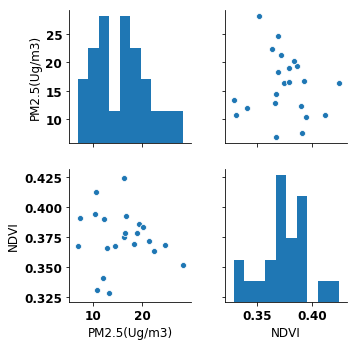

In [602]:
pm25_ndvi_sns_plot= sns.pairplot(merged_monthly_pm25_ndvi)
plt.show()
pm25_ndvi_sns_plot.savefig(os.path.join(filepath ,"monthly_pm25_vi_sns_plot.png"))

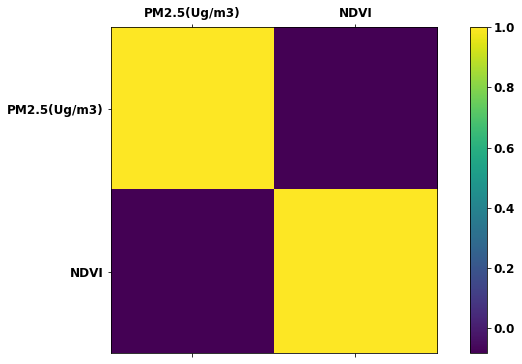

In [603]:
fig_corr_matrix = plt.figure(figsize=(12,6))
ax_fig_corr_matrix = fig_corr_matrix.add_subplot(111)
cax = ax_fig_corr_matrix.matshow(merged_monthly_pm25_ndvi.corr())
plt.xticks(range(len(merged_monthly_pm25_ndvi.columns)), merged_monthly_pm25_ndvi.columns)
plt.yticks(range(len(merged_monthly_pm25_ndvi.columns)),merged_monthly_pm25_ndvi.columns)
fig_corr_matrix.colorbar(cax)
plt.show()

fig_corr_matrix.savefig(os.path.join(filepath, 'monthly_pm25_vi_corr_matrix.png'))

### Combining the daily airquality dataset , daily meteorological dataset and greenness(VI) dataset
 - The vegetation indices are sampled on monthly basis, we upsampled them to get values for daily vi data

In [604]:
daily_airquality_data =  daily_average_airquality_data_concentrations
print(daily_airquality_data.shape)
daily_timestamp = daily_airquality_data.index.values
print(len(daily_timestamp))
daily_airquality_data["TimeStamp"] = daily_timestamp
print(daily_airquality_data.columns)
daily_airquality_data["TimeStamp"] = pd.to_datetime(daily_airquality_data["TimeStamp"])
print(daily_airquality_data.shape)

# month and year for merging with vi data
daily_airquality_data['MonthOfYear'] = pd.to_datetime(daily_timestamp).strftime('%m-%Y') 
daily_airquality_data.head()

(644, 3)
644
Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'TimeStamp'], dtype='object')
(644, 4)


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear
TimeStamp,,,,,
2017-07-01,14.11,21.52,50.04,2017-07-01,07-2017
2017-07-02,34.35,49.05,114.03,2017-07-02,07-2017
2017-07-03,21.07,26.82,48.24,2017-07-03,07-2017
2017-07-04,15.51,22.61,43.63,2017-07-04,07-2017
2017-07-05,22.63,31.80,55.22,2017-07-05,07-2017


In [605]:
daily_airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear
TimeStamp,,,,,
2017-07-01,14.11,21.52,50.04,2017-07-01,07-2017
2017-07-02,34.35,49.05,114.03,2017-07-02,07-2017
2017-07-03,21.07,26.82,48.24,2017-07-03,07-2017
2017-07-04,15.51,22.61,43.63,2017-07-04,07-2017
2017-07-05,22.63,31.80,55.22,2017-07-05,07-2017


In [606]:
daily_meteorology_data =  daily_meteorological_data_with_out_missing_values
print(daily_meteorology_data.shape)
timestamp = daily_meteorology_data.index.values
print(len(timestamp))
daily_meteorology_data["TimeStamp"] = timestamp
print(daily_meteorology_data.columns)
daily_meteorology_data["TimeStamp"] = pd.to_datetime(daily_meteorology_data["TimeStamp"])
print(daily_meteorology_data.shape)

(529, 16)
529
Index(['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)',
       'total radiation (W/m2)', 'average temperature (oC)',
       'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W', 'TimeStamp'],
      dtype='object')
(529, 17)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [607]:
daily_meteorology_data.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W,TimeStamp
day,,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0,2017-09-09
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0,2017-09-10
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0,2017-09-11
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0,2017-09-13
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0,2017-09-24


In [608]:
daily_meteorology_data

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W,TimeStamp
day,,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0,2017-09-09
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0,2017-09-10
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0,2017-09-11
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0,2017-09-13
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0,2017-09-24
2017-09-25,80.21,7.88,87.627,4820.36,21.65,0.70,0.39,1.03,1,0,0,0,0,0,0,0,2017-09-25
2017-09-26,90.25,0.00,87.645,0.00,19.60,0.62,0.19,1.23,0,1,0,0,0,0,0,0,2017-09-26
2017-10-31,84.50,1.07,87.665,0.00,20.55,0.95,0.71,1.24,0,0,1,0,0,0,0,0,2017-10-31
2017-11-01,73.00,1.67,87.624,4707.15,23.25,0.69,0.32,1.38,0,0,0,0,0,1,0,0,2017-11-01


## merging vi  data to daily airquality data
   - to comeup with daily airquality data containing vi data

In [609]:
daily_combined_airquality_vi_dataset= pd.merge(daily_airquality_data, monthly_vi_data, on='MonthOfYear')

In [610]:
daily_combined_airquality_vi_dataset.head(3)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear,EVI,NDVI
0,14.11,21.52,50.04,2017-07-01,07-2017,0.1896,0.3638
1,34.35,49.05,114.03,2017-07-02,07-2017,0.1896,0.3638
2,21.07,26.82,48.24,2017-07-03,07-2017,0.1896,0.3638


In [611]:
daily_combined_airquality_vi_dataset.columns

Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'TimeStamp', 'MonthOfYear',
       'EVI', 'NDVI'],
      dtype='object')

In [612]:
daily_merged_airquality_vi_dataset_of_interest= daily_combined_airquality_vi_dataset.drop(['MonthOfYear'], axis=1)
daily_merged_airquality_vi_dataset = daily_merged_airquality_vi_dataset_of_interest.set_index('TimeStamp')
daily_merged_airquality_vi_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
TimeStamp,,,,,
2017-07-01,14.11,21.52,50.04,0.1896,0.3638
2017-07-02,34.35,49.05,114.03,0.1896,0.3638
2017-07-03,21.07,26.82,48.24,0.1896,0.3638
2017-07-04,15.51,22.61,43.63,0.1896,0.3638
2017-07-05,22.63,31.80,55.22,0.1896,0.3638


In [613]:
daily_merged_airquality_vi_dataset.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
TimeStamp,,,,,
2019-04-01,4.68,6.045,10.565,0.2186,0.3674
2019-04-02,4.68,6.045,10.565,0.2186,0.3674
2019-04-03,4.56,5.910,10.450,0.2186,0.3674
2019-04-04,4.93,6.590,11.600,0.2186,0.3674
2019-04-05,6.69,8.650,13.000,0.2186,0.3674


In [614]:
show_dataframe_info(daily_merged_airquality_vi_dataset)

(644, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'EVI', 'NDVI']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 644 entries, 2017-07-01 to 2019-04-05
Data columns (total 5 columns):
PM1(Ug/m3)      644 non-null float64
PM2.5(Ug/m3)    644 non-null float64
PM10(Ug/m3)     644 non-null float64
EVI             644 non-null float64
NDVI            644 non-null float64
dtypes: float64(5)
memory usage: 30.2 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
EVI             float64
NDVI            float64
dtype: object


In [615]:
print(daily_meteorology_data.shape)

(529, 17)


In [616]:
daily_combined_dataset= pd.merge( daily_merged_airquality_vi_dataset,daily_meteorology_data, on='TimeStamp')

In [617]:
daily_combined_dataset.shape

(529, 22)

In [618]:
show_dataframe_info(daily_combined_dataset)

(529, 22)
['TimeStamp', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'EVI', 'NDVI', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 528
Data columns (total 22 columns):
TimeStamp                   529 non-null datetime64[ns]
PM1(Ug/m3)                  529 non-null float64
PM2.5(Ug/m3)                529 non-null float64
PM10(Ug/m3)                 529 non-null float64
EVI                         529 non-null float64
NDVI                        529 non-null float64
average humidity (%)        529 non-null float64
total rainfall (mm)         529 non-null float64
average pressure (kPa)      529 non-null float64
total r

In [619]:
daily_combined_dataset.head(20)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),...,min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09,11.35,14.23,30.41,0.2002,0.3660,86.22,0.00,87.666,0.00,...,0.29,1.19,0,0,0,0,0,1,0,0
1,2017-09-10,7.67,9.78,27.35,0.2002,0.3660,78.17,0.00,87.715,3575.39,...,0.31,1.41,0,0,1,0,0,0,0,0
2,2017-09-11,7.39,10.63,29.46,0.2002,0.3660,75.27,1.77,87.657,4600.25,...,0.44,1.27,0,0,1,0,0,0,0,0
3,2017-09-13,9.19,12.39,23.34,0.2002,0.3660,90.00,0.00,87.730,0.00,...,0.91,0.91,1,0,0,0,0,0,0,0
4,2017-09-24,9.55,14.08,31.79,0.2002,0.3660,78.17,0.00,87.780,4839.53,...,0.30,1.63,0,0,0,0,0,1,0,0
5,2017-09-25,6.06,8.88,21.48,0.2002,0.3660,80.21,7.88,87.627,4820.36,...,0.39,1.03,1,0,0,0,0,0,0,0
6,2017-09-26,10.27,14.95,29.77,0.2002,0.3660,90.25,0.00,87.645,0.00,...,0.19,1.23,0,1,0,0,0,0,0,0
7,2017-10-31,6.86,10.51,25.02,0.2086,0.3898,84.50,1.07,87.665,0.00,...,0.71,1.24,0,0,1,0,0,0,0,0
8,2017-11-01,6.78,11.49,22.38,0.2021,0.3925,73.00,1.67,87.624,4707.15,...,0.32,1.38,0,0,0,0,0,1,0,0
9,2017-11-02,9.20,14.87,33.29,0.2021,0.3925,74.96,0.02,87.610,4683.44,...,0.22,1.28,0,0,0,0,0,0,0,1


### Remove the time column from combined dataset
- make timestamp  the index values

In [620]:
merged_daily_airquality_greenness_meteorological_dataset  = daily_combined_dataset.set_index('TimeStamp')
merged_daily_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),...,min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-09-09,11.35,14.23,30.41,0.2002,0.366,86.22,0.00,87.666,0.00,20.92,...,0.29,1.19,0,0,0,0,0,1,0,0
2017-09-10,7.67,9.78,27.35,0.2002,0.366,78.17,0.00,87.715,3575.39,21.91,...,0.31,1.41,0,0,1,0,0,0,0,0
2017-09-11,7.39,10.63,29.46,0.2002,0.366,75.27,1.77,87.657,4600.25,23.05,...,0.44,1.27,0,0,1,0,0,0,0,0
2017-09-13,9.19,12.39,23.34,0.2002,0.366,90.00,0.00,87.730,0.00,20.46,...,0.91,0.91,1,0,0,0,0,0,0,0
2017-09-24,9.55,14.08,31.79,0.2002,0.366,78.17,0.00,87.780,4839.53,22.02,...,0.30,1.63,0,0,0,0,0,1,0,0


###  merging vi  data to hourly airquality and hourly meteorological data
   - to comeup with hourly airquality data containing vi data

In [621]:
hourly_meteorological_data_in_same_daterange_with_daily_airquality_data.head(4)

,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
dateTime,,,,,,,,,,,,,,
2017-09-09 18:00:00,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0


In [622]:
show_dataframe_info(hourly_meteorological_data_values)

(14288, 7)
['humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'winddirection', 'windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14288 entries, 2017-09-09 18:00:00 to 2019-06-15 02:00:00
Data columns (total 7 columns):
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
winddirection         14288 non-null object
windspeed (m/s)       14288 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 893.0+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 humidity (%)            int64
precipitation (mm)    float64
pressure (kPa)        float64
radiation (W/m2)      float64
temperature (oC)      float64
winddirection          object
windspeed (m/s)       float64
dtype: object


In [623]:
hourly_average_airquality_data_concentrations.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-07-01 00:00:00,17.15,23.09,43.56,0,00:00:00
2017-07-01 01:00:00,33.85,44.78,78.61,1,01:00:00
2017-07-01 02:00:00,37.79,52.78,82.12,2,02:00:00
2017-07-01 03:00:00,13.99,19.19,27.34,3,03:00:00
2017-07-01 04:00:00,13.23,18.15,25.93,4,04:00:00


In [624]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(15447, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15447 entries, 2017-07-01 00:00:00 to 2019-04-05 14:00:00
Freq: H
Data columns (total 5 columns):
PM1(Ug/m3)      15447 non-null float64
PM2.5(Ug/m3)    15447 non-null float64
PM10(Ug/m3)     15447 non-null float64
hour            15447 non-null int64
Hour            15447 non-null timedelta64[ns]
dtypes: float64(3), int64(1), timedelta64[ns](1)
memory usage: 724.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)              float64
PM2.5(Ug/m3)            float64
PM10(Ug/m3)             float64
hour                      int64
Hour            timedelta64[ns]
dtype: object


In [625]:
hourly_airquality_data =  hourly_average_airquality_data_concentrations
print(hourly_airquality_data.shape)
hourly_timestamp = hourly_airquality_data.index.values
print(len(hourly_timestamp))
hourly_airquality_data["TimeStamp"] = hourly_timestamp
print(hourly_airquality_data.columns)
hourly_airquality_data["TimeStamp"] = pd.to_datetime(hourly_airquality_data["TimeStamp"])
print(hourly_airquality_data.shape)

# month and year for merging with vi data
hourly_airquality_data['MonthOfYear'] = pd.to_datetime(hourly_timestamp).strftime('%m-%Y') 
hourly_airquality_data.head()

(15447, 5)
15447
Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour',
       'TimeStamp'],
      dtype='object')
(15447, 6)


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,TimeStamp,MonthOfYear
TimeStamp,,,,,,,
2017-07-01 00:00:00,17.15,23.09,43.56,0,00:00:00,2017-07-01 00:00:00,07-2017
2017-07-01 01:00:00,33.85,44.78,78.61,1,01:00:00,2017-07-01 01:00:00,07-2017
2017-07-01 02:00:00,37.79,52.78,82.12,2,02:00:00,2017-07-01 02:00:00,07-2017
2017-07-01 03:00:00,13.99,19.19,27.34,3,03:00:00,2017-07-01 03:00:00,07-2017
2017-07-01 04:00:00,13.23,18.15,25.93,4,04:00:00,2017-07-01 04:00:00,07-2017


In [626]:
hourly_meteorology_data =  hourly_meteorological_data_in_same_daterange_with_daily_airquality_data
print(hourly_meteorology_data.shape)
hourly_timestamp = hourly_meteorology_data.index.values
#print(len(hourly_timestamp))
hourly_meteorology_data["TimeStamp"] = hourly_timestamp
#print(hourly_meteorology_data.columns)
hourly_meteorology_data["TimeStamp"] = pd.to_datetime(hourly_meteorology_data["TimeStamp"])
print(hourly_meteorology_data.shape)

(12596, 14)
(12596, 15)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [627]:
hourly_combined_airquality_vi_dataset= pd.merge(hourly_airquality_data, monthly_vi_data, on='MonthOfYear')
hourly_merged_airquality_vi_dataset_of_interest = hourly_combined_airquality_vi_dataset.drop(['MonthOfYear'], axis=1)
hourly_merged_airquality_vi_dataset = hourly_merged_airquality_vi_dataset_of_interest.set_index('TimeStamp')
hourly_merged_airquality_vi_dataset.head()
#hourly_combined_airquality_vi_dataset.head(3)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,EVI,NDVI
TimeStamp,,,,,,,
2017-07-01 00:00:00,17.15,23.09,43.56,0,00:00:00,0.1896,0.3638
2017-07-01 01:00:00,33.85,44.78,78.61,1,01:00:00,0.1896,0.3638
2017-07-01 02:00:00,37.79,52.78,82.12,2,02:00:00,0.1896,0.3638
2017-07-01 03:00:00,13.99,19.19,27.34,3,03:00:00,0.1896,0.3638
2017-07-01 04:00:00,13.23,18.15,25.93,4,04:00:00,0.1896,0.3638


In [628]:
hourly_combined_dataset= pd.merge(hourly_merged_airquality_vi_dataset,hourly_meteorology_data, on='TimeStamp')
merged_hourly_airquality_greenness_meteorological_dataset  = hourly_combined_dataset.set_index('TimeStamp')
merged_hourly_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,6.36,8.31,18.36,18,18:00:00,0.2002,0.366,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,9.98,12.27,18.93,19,19:00:00,0.2002,0.366,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,12.33,15.04,21.93,20,20:00:00,0.2002,0.366,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,16.61,22.81,45.38,21,21:00:00,0.2002,0.366,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,17.01,23.40,46.11,22,22:00:00,0.2002,0.366,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0


In [629]:
#show_dataframe_info(hourly_combined_dataset)
merged_hourly_airquality_greenness_meteorological_dataset = merged_hourly_airquality_greenness_meteorological_dataset.drop(['Hour'], axis=1)
merged_hourly_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,6.36,8.31,18.36,18,0.2002,0.366,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,9.98,12.27,18.93,19,0.2002,0.366,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,12.33,15.04,21.93,20,0.2002,0.366,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,16.61,22.81,45.38,21,0.2002,0.366,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,17.01,23.40,46.11,22,0.2002,0.366,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


### Save the combined datasets to the respective folder.

In [630]:
merged_monthly_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_monthly_airquality_greenness_meteorological_dataset.csv'))
merged_daily_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_daily_airquality_greenness_meteorological_dataset.csv'))
merged_hourly_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_hourly_airquality_greenness_meteorological_dataset.csv'))

### Feature Selection

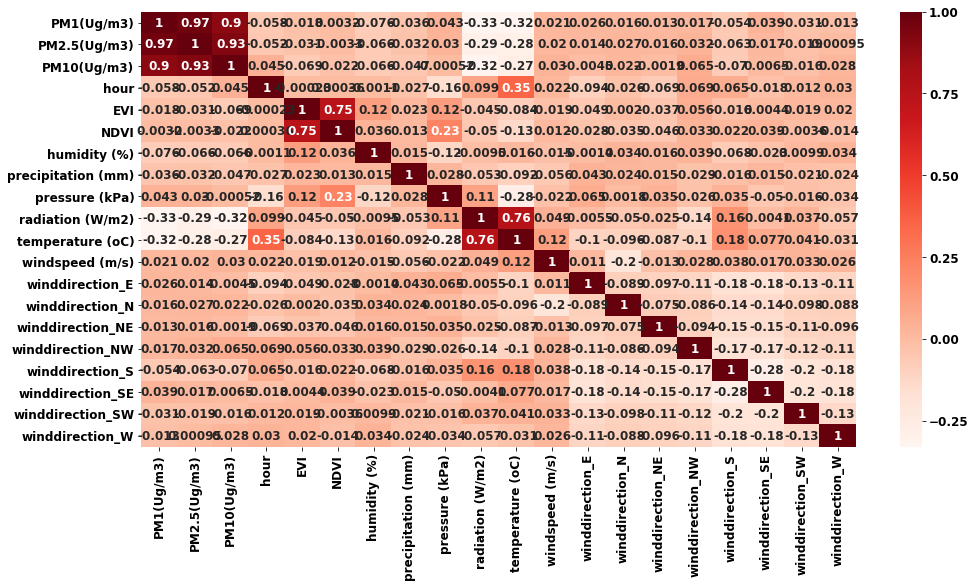

In [631]:
hourly_correlations = merged_hourly_airquality_greenness_meteorological_dataset.corr(method='pearson')
hourly_correlations.to_csv(os.path.join(filepath, 'hourly_correlations.csv'))

all_features_corr_plot = sns.heatmap(hourly_correlations, annot=True, cmap=plt.cm.Reds)
correlation_plot_figure = all_features_corr_plot.get_figure()    
correlation_plot_figure.savefig(os.path.join(filepath ,"correlation_pm25_heatmap_plot.png"))
plt.show()

In [632]:
#Correlation with output variable
correlation_target = abs(hourly_correlations['PM2.5(Ug/m3)']).sort_values(ascending=False)
#Selecting highly correlated features
relevant_features = correlation_target[correlation_target>0.5]
relevant_features

PM2.5(Ug/m3)    1.000000
PM1(Ug/m3)      0.971379
PM10(Ug/m3)     0.926407
Name: PM2.5(Ug/m3), dtype: float64

In [633]:
correlation_target

PM2.5(Ug/m3)          1.000000
PM1(Ug/m3)            0.971379
PM10(Ug/m3)           0.926407
radiation (W/m2)      0.291296
temperature (oC)      0.282909
humidity (%)          0.066293
winddirection_S       0.062518
hour                  0.051764
winddirection_NW      0.032299
precipitation (mm)    0.031548
EVI                   0.030585
pressure (kPa)        0.030154
winddirection_N       0.027073
windspeed (m/s)       0.019831
winddirection_SW      0.019356
winddirection_SE      0.017252
winddirection_NE      0.015886
winddirection_E       0.013934
NDVI                  0.003300
winddirection_W       0.000948
Name: PM2.5(Ug/m3), dtype: float64